In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# **TIME SERIES ANALYSIS FOR REAL ESTATE INVESTMENT**

## **Group 8 Collaborators**
**Students Names:**  
    1. Sammy Sifuna  
    2. Julius Charles  
    3. Waruchu Kuria  
    4. Rael Ndonye  
    5. Alan Omondi  
    6. Janet Khainza

# <img src="images/housing_image.jpg" width="1000"/>

## **1.0 Business Understanding**
       
### **1.1 Background**
Between 1996 to 2018, the U.S. real estate market underwent significant transformations. It commenced with an increase in home prices driven by a growing perception of real estate as a valuable long-term investment. However, the Great Recession between 2007 to 2009 brought about extensive declines in home values, triggering foreclosures and eroding trust.
Over time,low interest rates and government interventions helped restore stability and confidence in the market. Urbanization gained momentum as more people gravitated towards cities, younger individuals entered the housing market, and technology assumed a pivotal role. Although certain cities thrived, others faced challenges. Regulatory reforms were introduced to prevent potential crises. In conclusion, this era marked a period of adaptation and evolution in the dynamics of buying and selling homes.

### **1.2 Problem Statement**
Waridi Investments, a recently established real estate investment firm, has engaged our services to identify the top 5 zip codes with the potential for the highest return on investment when they sell in 5 years. Their strategic approach is to initiate short-term investments in one of the most thriving real estate markets in the United States of America. The company places significant emphasis on securing sound investments that ensure consistent cash flow, ultimately enabling them to reinvest effectively when the opportune moment arises.

### **1.3 Objectives**(Reviewed this)
* To determine the top 5 zip codes that show the highest potential return on investment (ROI) in 5 years.
* To identify which top 5 states have the highest ROI.
* To determine the best month to invest to maximize ROI.

#### **Hypotheis testing**(Reviewed this)
Null Hypothesis (H0): There time series is not stationary.

Alternative Hypothesis (H1): The time series is stationary.

## **2.0 Data Understanding**

This data represents median monthly housing sales prices for 265 zip codes in the USA, over the period of April 1996 through April 2018 as reported by Zillow.

Each row represents a unique zip code. Each record contains location information and median housing sales prices for each month.

There are 14723 rows and 272 variables:

* RegionID: Unique index
* RegionName: Unique Zip Code
* City: City in which the zip code is located
* State: State in which the zip code is located
* Metro: Metropolitan Area in which the zip code is located
* CountyName: County in which the zip code is located
* SizeRank: Numerical rank of size of zip code, ranked 1 through 14723
* 1996-04 through 2018-04: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code

We shall check for the accuracy of our forecasts using MSE (Mean Squared Error). This will provide us with the average error of our forecasts.

#### **Assumptions:**
1. The zip codes are representative of the broader real estate market in the United States.
2. The real estate market conditions during this period were influenced by various economic and socio-political factors.
3. The data covers a combination of urban, suburban, and rural area.
4. The data doesn't reflect significant improvements or renovations made to properties over time that could increase or decrease prices.

In [2]:
# pip install pmdarima

In [3]:
# pip install prophet

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
matplotlib.rcParams['timezone'] = 'UTC'
import seaborn as sns

from scipy import stats
from random import gauss as gs
import math
import datetime

from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

from pmdarima import auto_arima
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

import itertools

ModuleNotFoundError: No module named 'seaborn'

In [5]:
# import pmdarima as pm

In [1]:
#loading dataset and viewing first 5 rows
data = pd.read_csv('data/zillow_data.csv')

data.head()

NameError: name 'pd' is not defined

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [8]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [9]:
# Examine the shape of the dataset
data.shape

(14723, 272)

In [10]:
# Viewing number of zipcodes in dataset and nan values
print('Total number of zipcodes:', len(data))
data.iloc[:, :20].isna().sum() # up to 20th column

Total number of zipcodes: 14723


RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
dtype: int64

The data understanding above shows as follows:
*   Our data has 14273 rows and 272 columns
*   The columns have bothe categorical and numerical features,
City', 'State', 'Metro', 'CountyName' are of categorical features while RegionID', 'RegionName', 'SizeRank' and monthly columns of sales price per zipcode(1996-04 through 2018-04) are of numerical type
* The 'Metro' and mmonthly columns of sales price per zipcode have missing values.

We shall proceed to data preparation to deal with duplicates missing values, visualization and feature engineering.

## **3.0 Data Preparation**

### 3.1. Exploratory Data Analysis(EDA) and Feature Engineering**
First, some basic EDA and Feature Engineering will be performed.
- **N/B:** There will be a lot of EDA and feature engineering required throughout this project, therefore, the processes will be performed as needed.

### **a. Checking for Duplicates**
- The data has no duplicates.

In [11]:
# check for duplicates
data.duplicated().sum()

0

### **b. Changing `RegionName` to `ZipCode`**

The data types are okay as expected.

In [12]:
#Inspecting dataframe dtypes
data.iloc[:, :20].dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
dtype: object

However, `RegionName` column will be renamed to `ZipCode` for easier recognition.
- Further, the column will be converted to a string.

In [13]:
# change 'RegionName' column to 'ZipCode' to avoid confusion
data.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

# changing dtype to str
data.ZipCode = data.ZipCode.astype('string')

#confirming the change
print(data.dtypes["ZipCode"])

string


### **c. Missing Values**

There are some missing values in the `Metro` and `dates` columns. To deal with this:
- Missing values in the **Metro** column will be replaced with **missing**.  
- Missing values in the dates columns will be backfilled.

In [14]:
data.isnull().sum()

RegionID       0
ZipCode        0
City           0
State          0
Metro       1043
            ... 
2017-12        0
2018-01        0
2018-02        0
2018-03        0
2018-04        0
Length: 272, dtype: int64

In [15]:
# Define a function to explore missing data
def missing(data):
    missing_data = data.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

# Apply missing_data function to the dataframe
missing(data)

0
Metro    1043
1996-04  1039
1996-05  1039
1996-06  1039
1996-07  1039
...       ...
2014-02    56
2014-03    56
2014-04    56
2014-05    56
2014-06    56

[220 rows x 1 columns]

In [16]:
# replacing the missing values bin Metro with 'missing'
data.Metro.fillna('missing', inplace=True)

# interpolate missing values on date columns
data.interpolate(method="pad", inplace=True)

data.isna().sum().sum()

0

### **d. Creating New Columns for Analysis**

**Select Top 10 States to Invest in Real Estate**
- The data will first be filtered to choose the ten best states to invest in real estate in the USA. The guiding information has been extracted from this article by [Fit Small Business](https://fitsmallbusiness.com/best-and-worst-states-to-invest-in-real-estate/).
- The top 10 states most suitable for investment that yields high returns in real estate are:
1. Georgia (GA)
2. Utah (UT)
3. Texas (TX)
4. North Carolina (NC)
5. New Jersey (NJ)
6. Tennessee (TN)
7. Washington (WA)
8. Delaware (DE)
9. Nebraska (NE)
10. Florida (FL).
- This narrows down the number of Zip Codes to **4039**.

In [17]:
# List of states to invest in
states_to_invest = ['GA', 'UT', 'TX', 'NC', 'NJ', 'TN', 'WA', 'DE', 'NE', 'FL']

# Filter data for the selected states
# new df - data_states created
data_states = data[data['State'].isin(states_to_invest)].copy()

# Drop unnecessary columns
columns_to_drop = ['RegionID', 'SizeRank']
data_states.drop(columns_to_drop, axis=1, inplace=True)

# Reset the index
data_states.reset_index(drop=True, inplace=True)

print('Total Zipcodes in DataFrame:', len(data_states))
data_states.head()

Total Zipcodes in DataFrame: 4039


ZipCode      City State              Metro CountyName   1996-04   1996-05  \
0   75070  McKinney    TX  Dallas-Fort Worth     Collin  235700.0  236900.0   
1   77494      Katy    TX            Houston     Harris  210400.0  212200.0   
2   79936   El Paso    TX            El Paso    El Paso   77300.0   77300.0   
3   77084   Houston    TX            Houston     Harris   95000.0   95200.0   
4   77449      Katy    TX            Houston     Harris   95400.0   95600.0   

    1996-06   1996-07   1996-08  ...  2017-07  2017-08  2017-09  2017-10  \
0  236700.0  235400.0  233300.0  ...   308000   310000   312500   314100   
1  212200.0  210700.0  208300.0  ...   321000   320600   320200   320400   
2   77300.0   77300.0   77400.0  ...   119100   119400   120000   120300   
3   95400.0   95700.0   95900.0  ...   157900   158700   160200   161900   
4   95800.0   96100.0   96400.0  ...   166800   167400   168400   169600   

   2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0   315000   316600   318100   319600   321100   321800  
1   320800   321200   321200   323000   326900   329900  
2   120300   120300   120300   120500   121000   121500  
3   162800   162800   162800   162900   163500   164300  
4   170900   172300   173300   174200   175400   176200  

[5 rows x 270 columns]

In [18]:
data_states.shape

(4039, 270)

### **e. Calculating ROI and CV**
- Next, 5 columns will be created:
1. **`CV`**: This will store the coefficient of variation values. The information is used by investors to gauge the degree of volatility or risk in relation to the anticipated returns from their investments.
    - It is calculated as standard deviation divided by the mean.
    - A low CV means there is a lower investment risk, and vice versa for a high CV.
    - 22-year and 5-year CV will be calculated.
2. **`ROI`**: This will store values that show the measure of the profitability of an investment relative to its cost and is typically expressed as a percentage.
    - A high ROI indicates that the gains or profits obtained from the investment are significantly greater than the initial investment itself.
    - 22-year, 5-year and 3-year ROI will be calculated.

In [19]:
# 22-year ROI
data_states['ROI_all'] = round(((data_states['2018-04'] / data_states['1996-04']) - 1) * 100, 2)

## 5-year ROI
data_states['ROI_5yr'] = round(((data_states['2018-04'] - data_states['2013-04']) / data_states['2013-01']) * 100, 2)

## 3-year ROI
data_states['ROI_3yr'] = round(((data_states['2018-04'] - data_states['2015-04']) / data_states['2015-01']) * 100, 2)

# standard deviation 22 years
data_states['std_all'] = round(data_states.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1), 2)

# standard deviation 5 years
data_states['std_5yr'] = round(data_states.loc[:,'2013-04':'2018-04'].std(skipna=True, axis=1), 2)

# mean 22 years
data_states['mean_all'] = round(data_states.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1), 2)

# mean 5 years
data_states['mean_5yr'] = round(data_states.loc[:,'2013-04':'2018-04'].mean(skipna=True, axis=1), 2)

# 22-year CV
data_states['CV_all'] = round(data_states['std_all']/data_states['mean_all'] * 100, 2)

# 5-year CV
data_states['CV_5yr'] = round(data_states['std_5yr']/data_states['mean_5yr'] * 100, 2)

# Displaying the columns
data_states[['State', 'ZipCode','ROI_all','ROI_5yr', 'ROI_3yr', 'CV_all', 'CV_5yr']].head()

State ZipCode  ROI_all  ROI_5yr  ROI_3yr  CV_all  CV_5yr
0    TX   75070    36.53    54.40    25.38   15.27   12.46
1    TX   77494    56.80    28.34     7.86   14.39    7.24
2    TX   79936    57.18     7.08     5.49   17.83    2.31
3    TX   77084    72.95    44.66    16.92   14.23   10.54
4    TX   77449    84.70    48.51    22.41   14.70   11.80

In [20]:
#Check for zeros
data_states.describe()

1996-04       1996-05       1996-06       1996-07       1996-08  \
count  4.039000e+03  4.039000e+03  4.039000e+03  4.039000e+03  4.039000e+03   
mean   1.130141e+05  1.131389e+05  1.132644e+05  1.133919e+05  1.135325e+05   
std    7.531940e+04  7.529945e+04  7.529120e+04  7.529444e+04  7.531903e+04   
min    1.140000e+04  1.150000e+04  1.160000e+04  1.180000e+04  1.180000e+04   
25%    6.420000e+04  6.430000e+04  6.455000e+04  6.500000e+04  6.510000e+04   
50%    9.300000e+04  9.310000e+04  9.310000e+04  9.320000e+04  9.330000e+04   
75%    1.385000e+05  1.385500e+05  1.388500e+05  1.389000e+05  1.395500e+05   
max    1.075400e+06  1.075900e+06  1.076500e+06  1.077100e+06  1.077700e+06   

            1996-09       1996-10       1996-11       1996-12       1997-01  \
count  4.039000e+03  4.039000e+03  4.039000e+03  4.039000e+03  4.039000e+03   
mean   1.136936e+05  1.138956e+05  1.141223e+05  1.144401e+05  1.148368e+05   
std    7.536819e+04  7.545085e+04  7.556257e+04  7.572800e+04  7.593374e+04   
min    1.200000e+04  1.210000e+04  1.220000e+04  1.230000e+04  1.250000e+04   
25%    6.530000e+04  6.530000e+04  6.550000e+04  6.580000e+04  6.610000e+04   
50%    9.350000e+04  9.370000e+04  9.390000e+04  9.410000e+04  9.440000e+04   
75%    1.397500e+05  1.397000e+05  1.397000e+05  1.402000e+05  1.403000e+05   
max    1.078400e+06  1.079200e+06  1.080000e+06  1.081200e+06  1.083000e+06   

       ...       2018-04       ROI_all      ROI_5yr      ROI_3yr  \
count  ...  4.039000e+03   4039.000000  4039.000000  4039.000000   
mean   ...  2.574010e+05    132.097041    41.864100    26.182981   
std    ...  2.232511e+05    291.196220    29.319168    16.662601   
min    ...  2.830000e+04    -90.810000   -98.360000   -22.080000   
25%    ...  1.363000e+05     82.775000    22.825000    14.570000   
50%    ...  2.007000e+05    113.810000    37.060000    23.450000   
75%    ...  3.089000e+05    156.135000    55.545000    35.450000   
max    ...  4.686200e+06  17974.070000   698.740000   148.610000   

            std_all        std_5yr      mean_all      mean_5yr       CV_all  \
count  4.039000e+03    4039.000000  4.039000e+03  4.039000e+03  4039.000000   
mean   4.687989e+04   22512.632382  1.845001e+05  2.175472e+05    23.539834   
std    5.338848e+04   25668.227107  1.442130e+05  1.903114e+05     8.901805   
min    3.047250e+03     787.400000  2.538906e+04  2.982951e+04     7.160000   
25%    1.911797e+04    9339.875000  1.006408e+05  1.148328e+05    17.010000   
50%    3.306666e+04   16979.610000  1.454038e+05  1.664213e+05    22.610000   
75%    5.867429e+04   27739.750000  2.234775e+05  2.604779e+05    28.460000   
max    1.198596e+06  547540.750000  2.634498e+06  3.853979e+06   108.900000   

            CV_5yr  
count  4039.000000  
mean     10.504660  
std       6.125992  
min       0.920000  
25%       6.465000  
50%       9.710000  
75%      13.525000  
max     152.510000  

[8 rows x 274 columns]

In [21]:
# viewing the selected States by highest 22-yr ROI
states_roi = round(data_states.groupby('State', group_keys=False).sum()[['ROI_all', 'ROI_5yr', 'ROI_3yr']] / 100, 2)
states_roi.sort_values(by=['ROI_all'], ascending=False)

ROI_all  ROI_5yr  ROI_3yr
State                           
FL     1312.23   524.30   291.05
TX      920.99   384.54   242.72
WA      609.43   203.68   134.62
NJ      605.86    96.68    69.43
GA      565.04   144.20    76.19
TN      544.06   143.92   103.85
NC      494.98   107.31    79.93
UT      123.66    52.77    35.70
NE       83.83    25.40    18.56
DE       75.31     8.11     5.50

**Observations**  
Even though the analysis will be focussed on Zip Codes, the states' ROI analysis provides a general overview of zip codes to expect in the top-performing list.
- The State of Florida has the highest ROI for all specified periods.
- Even though New Jersey comes third in 22-year ROI, it performs poorly in the 5-year and 3-year ROI.
- Delaware State has the lowest ROI values for all periods.


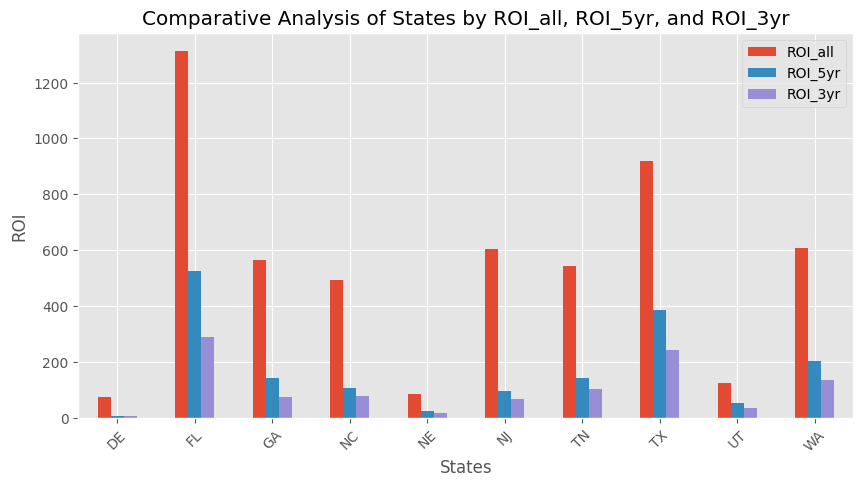

In [22]:
# Create a bar chart of the top 10 zip codes by ROI, ROI_5yr, and ROI_3yr
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
states_roi.plot(kind='bar', ax=ax)

# Set the title, labels, and ticks
plt.title("Comparative Analysis of States by ROI_all, ROI_5yr, and ROI_3yr")
ax.set_ylabel("ROI")
ax.set_xlabel("States")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# plt.savefig('images/ROI_comp.jpg')
# Show the bar chart
plt.show()

In [23]:
# displaying states by CV
states_cv = round(data_states.groupby('State', group_keys=False).sum()[['CV_all', 'CV_5yr']] / 100, 2)
states_cv.sort_values(by=['CV_all'], ascending=False)

CV_all  CV_5yr
State                
FL     253.18  115.77
TX     175.40  104.29
NJ     133.80   27.52
WA      90.08   47.92
NC      84.02   33.94
TN      83.48   37.11
GA      77.17   35.39
UT      24.72   12.67
NE      15.18    7.01
DE      13.73    2.65

**Observations**
- Again, Florida State has the highest CV values. This is an indication that even though the return on investment is great, it is still a risky state to invest in. Therefore, zip codes in this state will be investigated with a skeptical attitude.
- Delaware has low returns and low risk.

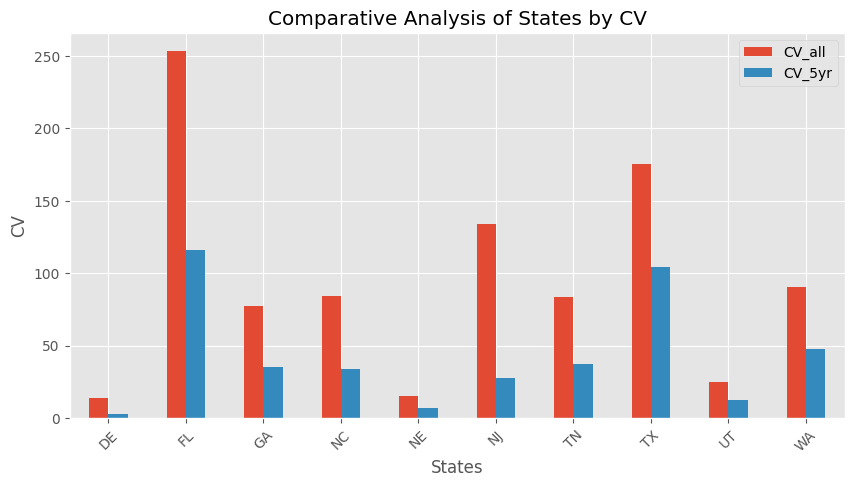

In [24]:
# Create a bar chart of the top 10 zip codes by CV_all and CV_5yr
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
states_cv.plot(kind='bar', ax=ax)

# Set the title, labels, and ticks
plt.title("Comparative Analysis of States by CV")
ax.set_ylabel("CV")
ax.set_xlabel("States")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# plt.savefig('images/CV_comp.jpg')
# Show the bar chart
plt.show()

In [25]:
data_states.head()

ZipCode      City State              Metro CountyName   1996-04   1996-05  \
0   75070  McKinney    TX  Dallas-Fort Worth     Collin  235700.0  236900.0   
1   77494      Katy    TX            Houston     Harris  210400.0  212200.0   
2   79936   El Paso    TX            El Paso    El Paso   77300.0   77300.0   
3   77084   Houston    TX            Houston     Harris   95000.0   95200.0   
4   77449      Katy    TX            Houston     Harris   95400.0   95600.0   

    1996-06   1996-07   1996-08  ...  2018-04  ROI_all  ROI_5yr  ROI_3yr  \
0  236700.0  235400.0  233300.0  ...   321800    36.53    54.40    25.38   
1  212200.0  210700.0  208300.0  ...   329900    56.80    28.34     7.86   
2   77300.0   77300.0   77400.0  ...   121500    57.18     7.08     5.49   
3   95400.0   95700.0   95900.0  ...   164300    72.95    44.66    16.92   
4   95800.0   96100.0   96400.0  ...   176200    84.70    48.51    22.41   

    std_all   std_5yr   mean_all   mean_5yr  CV_all  CV_5yr  
0  33537.10  33708.75  219655.85  270542.62   15.27   12.46  
1  37730.79  22203.23  262110.57  306739.34   14.39    7.24  
2  18167.08   2667.49  101875.47  115545.90   17.83    2.31  
3  17242.11  15133.49  121185.28  143532.79   14.23   10.54  
4  18603.29  17781.90  126530.19  150632.79   14.70   11.80  

[5 rows x 279 columns]

In [26]:
data_states.nunique()

ZipCode       4039
City          2370
State           10
Metro          219
CountyName     431
              ... 
std_5yr       4039
mean_all      4022
mean_5yr      4000
CV_all        2198
CV_5yr        1697
Length: 279, dtype: int64

### **f. Preparation for Modelling**
- The next lines of code will rank zip codes by different ROI and CV periods.  
- This will give an overview of how the zip codes performed individually.
- The codes will filter out the top 10 zip codes by the given criteria.

#### **1. All ROI Periods**
- Extract top 10 zip codes by `ROI_all` in descending order

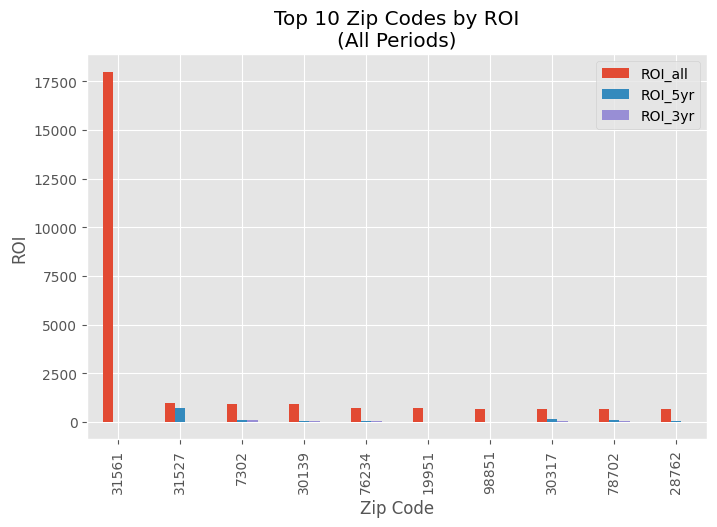

In [27]:
# Extract top 10 zip codes by ROI_all in descending order
top_10_zipcodes_roi_all = data_states.sort_values(by='ROI_all', ascending=False).head(10)

# Plotting the graph
fig, ax = plt.subplots(figsize=(8, 5))
top_10_zipcodes_roi_all.plot(kind='bar', x='ZipCode', y=['ROI_all', 'ROI_5yr', 'ROI_3yr'], ax=ax)
ax.set_xlabel('Zip Code')
ax.set_ylabel('ROI')
ax.set_title('Top 10 Zip Codes by ROI\n(All Periods)')
# plt.savefig('images/ROI_all')
plt.show()

**Observations**  
- Zip Code 31561 seems to be performing extremely well in terms of potential for profits.
- The oter zip codes are somewhere at the same performance level.

#### **2. All CV Periods**
- Extract top 10 zip codes by `CV_all` in descending order

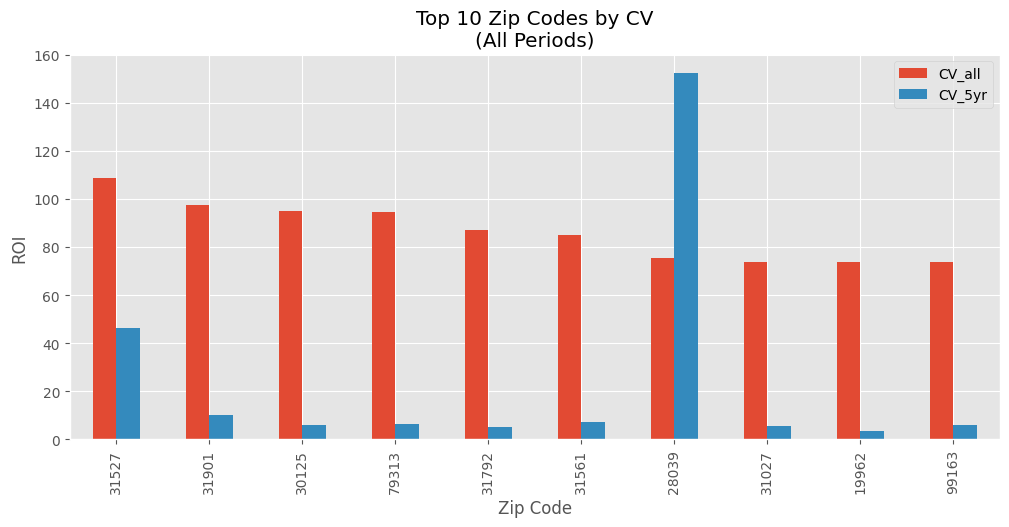

In [28]:
# Extract top 10 zip codes by CV_all in descending order
top_10_zipcodes_cv_all = data_states.sort_values(by='CV_all', ascending=False).head(10)

# Plotting the graph
fig, ax = plt.subplots(figsize=(12, 5))
top_10_zipcodes_cv_all.plot(kind='bar', x='ZipCode', y=['CV_all', 'CV_5yr'], ax=ax)
ax.set_xlabel('Zip Code')
ax.set_ylabel('ROI')
ax.set_title('Top 10 Zip Codes by CV\n(All Periods)')
# plt.savefig('images/CV_all')
plt.show()

**Observations**
- Zip code 28039 has the highest CV for the past five years.
- 31527 has the highest overall CV.
- The goal is to choose the zip codes with least CV. 31027, 19962 and 99163 may fit into this criteria,

#### **3. ROI and CV - 22 years**
- Extract top 10 zip codes by `ROI_all` in descending order.
- Plot both `ROI_all` and `CV_all`.

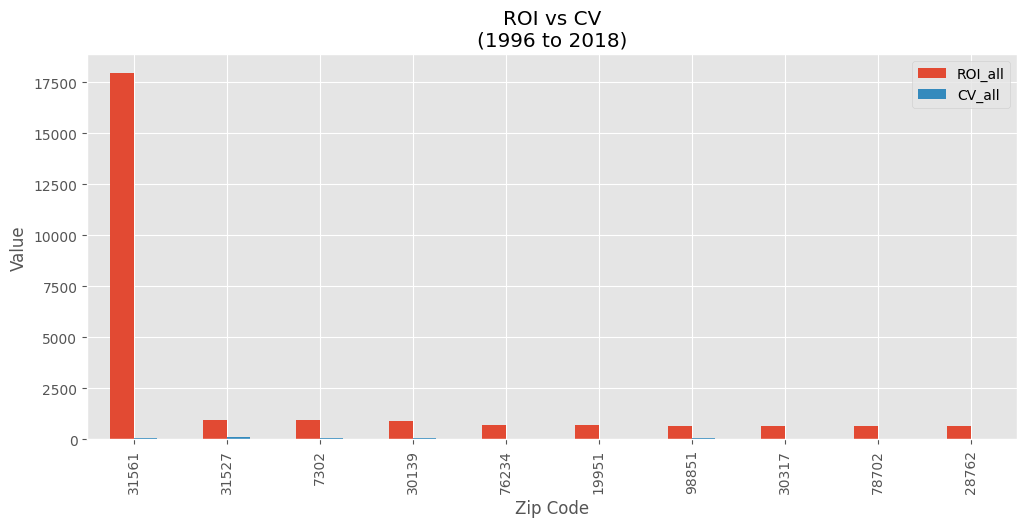

In [29]:
# Extract top 10 zip codes by ROI_all in descending order
top_10_zipcodes_roi_cv_all = data_states.sort_values(by='ROI_all', ascending=False).head(10)

# Plotting the graph
fig, ax = plt.subplots(figsize=(12, 5))
top_10_zipcodes_roi_cv_all.plot(kind='bar', x='ZipCode', y=['ROI_all', 'CV_all'], ax=ax)
ax.set_xlabel('Zip Code')
ax.set_ylabel('Value')
ax.set_title('ROI vs CV\n(1996 to 2018)')
# plt.savefig('images/ROI_CV_all')
plt.show()

#### **4. ROI and CV - 5 years**
- Extract top 10 zip codes by `ROI_5yr` in descending order.
- Plot both `ROI_5yr` and `CV_5yr`.

**Observations**
- This graph is unclear on how the two values compare because the extreme ROI value for 31561 seems to overpower the rest.

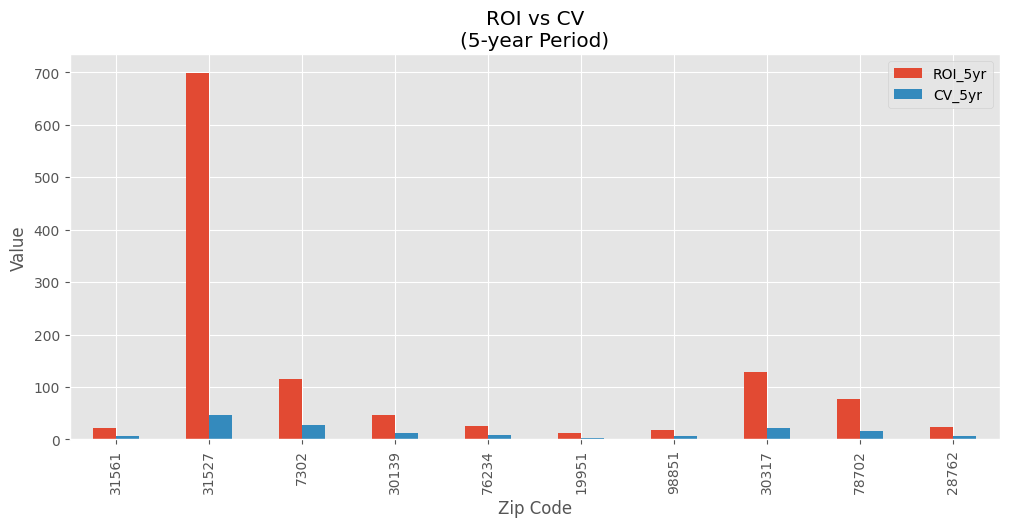

In [30]:
# Extract top 10 zip codes by ROI_all in descending order
top_10_zipcodes_roi_cv_5yr = data_states.sort_values(by='ROI_all', ascending=False).head(10)

# Plotting the graph
fig, ax = plt.subplots(figsize=(12, 5))
top_10_zipcodes_roi_cv_5yr.plot(kind='bar', x='ZipCode', y=['ROI_5yr', 'CV_5yr'], ax=ax)
ax.set_xlabel('Zip Code')
ax.set_ylabel('Value')
ax.set_title('ROI vs CV\n(5-year Period)')
# plt.savefig('images/ROI_CV_5yr')
plt.show()

**Observations**
- Here, 31527 stands out again with a high 5-year ROI. The CV, however, is unfortunately also high.
- 7302, 30317 and 78702 have high ROIs but higher than most CV values.
- This graph seems to give a better comparable visualization and will be used to form the time series for modelling.

In [31]:
top_10_zipcodes_roi_cv_5yr.head()

ZipCode         City State              Metro CountyName   1996-04  \
4025   31561   Sea Island    GA          Brunswick      Glynn   13500.0   
3877   31527    Brunswick    GA          Brunswick      Glynn   42000.0   
77      7302  Jersey City    NJ           New York     Hudson  137200.0   
3424   30139    Fairmount    GA            Calhoun     Gordon   14000.0   
2053   76234      Decatur    TX  Dallas-Fort Worth       Wise   25600.0   

       1996-05   1996-06   1996-07   1996-08  ...  2018-04   ROI_all  ROI_5yr  \
4025   13500.0   13500.0   13400.0   13400.0  ...  2440000  17974.07    20.96   
3877   42100.0   42100.0   42100.0   42200.0  ...   444700    958.81   698.74   
77    137800.0  138500.0  139100.0  139600.0  ...  1427300    940.31   116.07   
3424   14300.0   14500.0   14800.0   15000.0  ...   139600    897.14    47.56   
2053   25500.0   25500.0   25400.0   25400.0  ...   209800    719.53    26.61   

      ROI_3yr     std_all    std_5yr    mean_all    mean_5yr  CV_all  CV_5yr  
4025    -0.60  1198596.41  167148.70  1406018.87  2290147.54   85.25    7.30  
3877    16.15   122325.03  139115.63   112324.15   299737.70  108.90   46.41  
77      88.86   317338.24  263998.14   596591.32   976655.74   53.19   27.03  
3424    24.98    43029.09   12988.76    83786.04   113101.64   51.36   11.48  
2053    28.37    55208.38   15516.57   123060.75   176673.77   44.86    8.78  

[5 rows x 279 columns]

In [32]:
top_10_zipcodes_roi_cv_5yr.shape

(10, 279)

In [33]:
# confirming the list of Zip Codes
top_10_zipcodes_roi_cv_5yr[["ZipCode", "ROI_5yr", "CV_5yr"]]

ZipCode  ROI_5yr  CV_5yr
4025   31561    20.96    7.30
3877   31527   698.74   46.41
77      7302   116.07   27.03
3424   30139    47.56   11.48
2053   76234    26.61    8.78
3917   19951    12.49    3.62
3425   98851    17.95    7.55
2171   30317   128.87   22.76
1303   78702    76.49   16.18
2940   28762    24.30    6.94

 **Identifying the Zip Codes by City, County, Metro  and State**  


|Zip Code| City | County | Metro | State |
| ------ | :---------- | :------ | :----- | :----- |
| 31561  | Sea Island | Glynn County | Brunswick | Georgia |
| 31527  | Jekyll Island | Glynn County | Brunswick | Georgia |
| 7302   | Jersey City | Hudson County | New York |  New Jersey |
| 30139  | Fairmount | Gordon County | Calhoun | Georgia |
| 76234  | Decatur | Wise County | Dallas-Fort Worth |  Texas |
| 19951  | Harbeson | Sussex County | Salisbury |  Delaware |
| 98851  | Soap Lake | Grant County | Moses Lake |  Washington |
| 30317  | Atlanta | DeKalb County | Atlanta | Georgia |
| 78702  | Austin | Travis | Austin | Texas |
| 28762  | Old Fort | McDowell | Marion | North Carolina |

In [34]:
final_df = top_10_zipcodes_roi_cv_5yr.drop(['City', 'State', 'Metro', 'CountyName',
                                     'ROI_all', 'ROI_3yr',
                                       'std_all', 'std_5yr',
                                       'mean_all','mean_5yr',
                                       'CV_all'], axis=1)

In [35]:
final_df.head()

ZipCode   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
4025   31561   13500.0   13500.0   13500.0   13400.0   13400.0   13400.0   
3877   31527   42000.0   42100.0   42100.0   42100.0   42200.0   42200.0   
77      7302  137200.0  137800.0  138500.0  139100.0  139600.0  140100.0   
3424   30139   14000.0   14300.0   14500.0   14800.0   15000.0   15300.0   
2053   76234   25600.0   25500.0   25500.0   25400.0   25400.0   25400.0   

       1996-10   1996-11   1996-12  ...  2017-09  2017-10  2017-11  2017-12  \
4025   13400.0   13400.0   13500.0  ...  2344700  2359500  2403900  2435600   
3877   42200.0   42200.0   42300.0  ...   400100   398800   400900   406400   
77    140700.0  141400.0  142300.0  ...  1411000  1435900  1446300  1447800   
3424   15700.0   16000.0   16400.0  ...   129900   131600   132600   133900   
2053   25500.0   25500.0   25600.0  ...   197100   198400   200300   202900   

      2018-01  2018-02  2018-03  2018-04  ROI_5yr  CV_5yr  
4025  2451700  2455200  2455800  2440000    20.96    7.30  
3877   413600   414200   425400   444700   698.74   46.41  
77    1454900  1453900  1439500  1427300   116.07   27.03  
3424   135200   137000   138600   139600    47.56   11.48  
2053   204600   206100   207900   209800    26.61    8.78  

[5 rows x 268 columns]

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4025 to 2940
Columns: 268 entries, ZipCode to CV_5yr
dtypes: float64(221), int64(46), string(1)
memory usage: 21.0 KB


### **5.0 Converting to Time Series**

In [37]:
time_df= final_df.melt(id_vars=['ZipCode', 'ROI_5yr', 'CV_5yr'], var_name='Time', value_name='Sale Price')
# time_df['Time'] = pd.to_datetime(final_df['Time'], infer_datetime_format=True)
time_df['Time'] = pd.to_datetime(time_df['Time'])
time_df.set_index('Time', inplace=True)
time_df = time_df.pivot_table('Sale Price', ['Time'], 'ZipCode')
time_df.head()

ZipCode       19951    28762    30139    30317    31527    31561     7302   \
Time                                                                         
1996-04-01  34500.0  19200.0  14000.0  51800.0  42000.0  13500.0  137200.0   
1996-05-01  34900.0  19700.0  14300.0  52500.0  42100.0  13500.0  137800.0   
1996-06-01  35200.0  20100.0  14500.0  53200.0  42100.0  13500.0  138500.0   
1996-07-01  35700.0  20600.0  14800.0  53900.0  42100.0  13400.0  139100.0   
1996-08-01  36100.0  21000.0  15000.0  54500.0  42200.0  13400.0  139600.0   

ZipCode       76234    78702    98851  
Time                                   
1996-04-01  25600.0  55600.0  14000.0  
1996-05-01  25500.0  56700.0  14300.0  
1996-06-01  25500.0  57900.0  14500.0  
1996-07-01  25400.0  59300.0  14800.0  
1996-08-01  25400.0  60800.0  15000.0

In [38]:
time_df.index.name

'Time'

The boxplot below shows the averages home values for the selected zip codes over the dataset's time period.

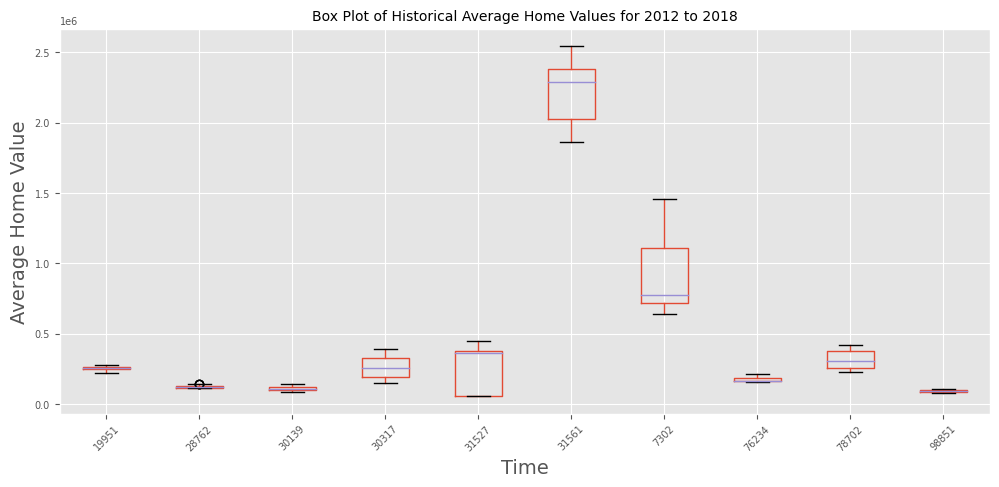

In [88]:
start_year = 2012
end_year = 2018

# Filter data for the specified range of years
filtered_df = time_df.loc[f'{start_year}-01':f'{end_year}-12']

# Create a box plot
plt.figure(figsize=(12, 5))
filtered_df.boxplot(figsize=(10, 5))
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average Home Value', fontsize=14)
plt.title(f'Box Plot of Historical Average Home Values for {start_year} to {end_year}')
plt.xticks(rotation=45)
plt.show()

In [39]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   19951   265 non-null    float64
 1   28762   265 non-null    float64
 2   30139   265 non-null    float64
 3   30317   265 non-null    float64
 4   31527   265 non-null    float64
 5   31561   265 non-null    float64
 6   7302    265 non-null    float64
 7   76234   265 non-null    float64
 8   78702   265 non-null    float64
 9   98851   265 non-null    float64
dtypes: float64(10)
memory usage: 22.8 KB


In [40]:
time_df.describe()

ZipCode          19951          28762          30139          30317  \
count       265.000000     265.000000     265.000000     265.000000   
mean     199729.433962   85044.528302   83786.037736  187885.660377   
std       86478.435971   38492.697781   43029.086284   78258.636020   
min       34500.000000   19200.000000   14000.000000   51800.000000   
25%      117300.000000   41700.000000   29100.000000  156400.000000   
50%      240700.000000  106800.000000   99400.000000  185700.000000   
75%      263300.000000  116700.000000  120100.000000  218500.000000   
max      312800.000000  143000.000000  139600.000000  391600.000000   

ZipCode          31527         31561         7302           76234  \
count       265.000000  2.650000e+02  2.650000e+02     265.000000   
mean     112324.150943  1.406019e+06  5.965913e+05  123060.754717   
std      122325.030043  1.198596e+06  3.173382e+05   55208.380452   
min       42000.000000  1.340000e+04  1.372000e+05   25400.000000   
25%       56200.000000  2.480000e+04  3.259000e+05   76000.000000   
50%       58800.000000  2.032300e+06  6.432000e+05  159300.000000   
75%       61400.000000  2.451700e+06  7.713000e+05  164600.000000   
max      444700.000000  2.935800e+06  1.454900e+06  209800.000000   

ZipCode          78702          98851  
count       265.000000     265.000000  
mean     224687.169811   79446.037736  
std       79154.542366   40406.572857  
min       55600.000000   14000.000000  
25%      199000.000000   29100.000000  
50%      220300.000000   91100.000000  
75%      233200.000000  113400.000000  
max      419800.000000  135900.000000

The line graph below shows the historical average home values for the selected zip codes over the dataset's time period.

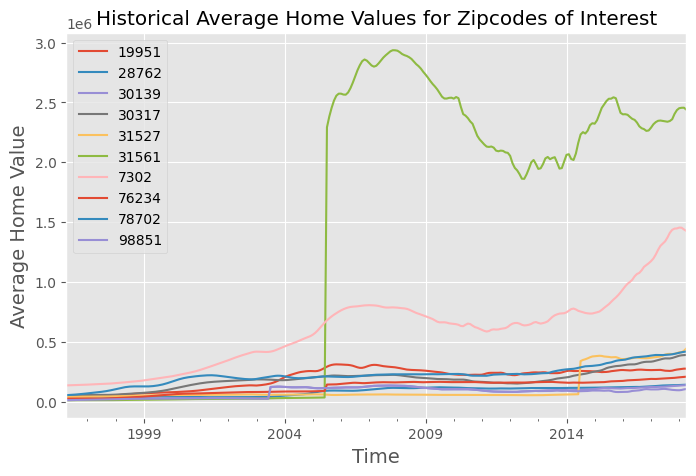

In [42]:
time_df.plot(figsize=(8,5))
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average Home Value', fontsize=14)
plt.title('Historical Average Home Values for Zipcodes of Interest')
# plt.savefig('images/hist_avg')
plt.legend();

In [43]:
time_df.columns

Index(['19951', '28762', '30139', '30317', '31527', '31561', '7302', '76234',
       '78702', '98851'],
      dtype='string', name='ZipCode')

**Observations**
- We shall remove **`31561`** and **`7302`**. They are outliers in the dataset and have dramatic trends over the period under review.

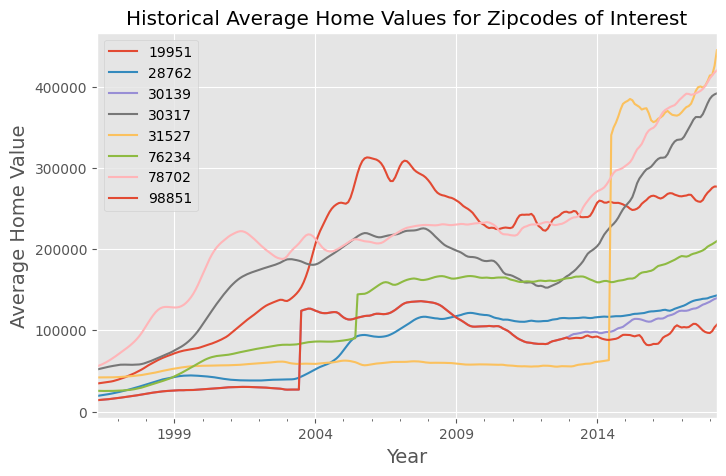

In [44]:
top_8_df = time_df.drop(['31561','7302'], axis=1)
top_8_df.plot(figsize=(8,5))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Home Value', fontsize=14)
plt.title('Historical Average Home Values for Zipcodes of Interest')
# plt.savefig('images/hist_avg_top8')
plt.legend();

In [45]:
# confirming that 8 zipcodes are left
top_8_df.head()

ZipCode       19951    28762    30139    30317    31527    76234    78702  \
Time                                                                        
1996-04-01  34500.0  19200.0  14000.0  51800.0  42000.0  25600.0  55600.0   
1996-05-01  34900.0  19700.0  14300.0  52500.0  42100.0  25500.0  56700.0   
1996-06-01  35200.0  20100.0  14500.0  53200.0  42100.0  25500.0  57900.0   
1996-07-01  35700.0  20600.0  14800.0  53900.0  42100.0  25400.0  59300.0   
1996-08-01  36100.0  21000.0  15000.0  54500.0  42200.0  25400.0  60800.0   

ZipCode       98851  
Time                 
1996-04-01  14000.0  
1996-05-01  14300.0  
1996-06-01  14500.0  
1996-07-01  14800.0  
1996-08-01  15000.0

#### **a. Adjusting the Review Period (changed month to April)**
- The was a market recession during the period 2008 - 2011. The housing bubble burst may likely lead to some misleading data and assumptions.
- As a result, the analysis will consider data from April 2012 to April 2018.
- New DataFrame is named **`recent_time**.

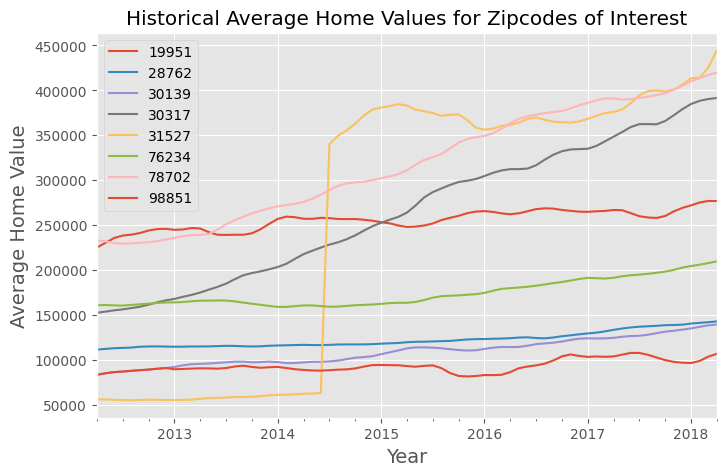

In [46]:
recent_time = top_8_df['2012-04-01':]
recent_time.plot(figsize=(8, 5))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Home Value', fontsize=14)
plt.title('Historical Average Home Values for Zipcodes of Interest')
plt.legend()
# plt.savefig('images/hist_avg_recent_time');

In [47]:
recent_time.head()

ZipCode        19951     28762    30139     30317    31527     76234  \
Time                                                                   
2012-04-01  225200.0  111600.0  83600.0  152600.0  56400.0  161000.0   
2012-05-01  230400.0  112400.0  85300.0  153900.0  56200.0  161200.0   
2012-06-01  235800.0  113200.0  86600.0  155300.0  55800.0  160800.0   
2012-07-01  238500.0  113500.0  87200.0  156400.0  55400.0  160600.0   
2012-08-01  239500.0  113900.0  88000.0  157800.0  55300.0  161300.0   

ZipCode        78702    98851  
Time                           
2012-04-01  233200.0  83600.0  
2012-05-01  232000.0  85300.0  
2012-06-01  230200.0  86600.0  
2012-07-01  229500.0  87200.0  
2012-08-01  229900.0  88000.0

In [48]:
# Converting columns to str
recent_time.columns = recent_time.columns.astype(str)
zipcode_list =  top_8_df.columns.astype(str)

recent_time.columns

Index(['19951', '28762', '30139', '30317', '31527', '76234', '78702', '98851'], dtype='object', name='ZipCode')

In [49]:
# Define a dictionary to map zip codes to their corresponding names
zip_to_name = {
    '19951': 'Harbeson, DE',
    '28762': 'Old Fort, NC',
    '30139': 'Fairmount, GA',
    '30317': 'Atlanta, GA',
    '31527': 'Jekyll Island, GA',
    '76234': 'Decatur, TX',
    '78702': 'Austin, TX',
    '98851': 'Soap Lake, WA'
}

# Map only the columns that haven't been renamed yet
recent_time.columns = [zip_to_name[col] if col in zip_to_name else col for col in recent_time.columns]

# Print the updated DataFrame
recent_time.head()

Harbeson, DE  Old Fort, NC  Fairmount, GA  Atlanta, GA  \
Time                                                                 
2012-04-01      225200.0      111600.0        83600.0     152600.0   
2012-05-01      230400.0      112400.0        85300.0     153900.0   
2012-06-01      235800.0      113200.0        86600.0     155300.0   
2012-07-01      238500.0      113500.0        87200.0     156400.0   
2012-08-01      239500.0      113900.0        88000.0     157800.0   

            Jekyll Island, GA  Decatur, TX  Austin, TX  Soap Lake, WA  
Time                                                                   
2012-04-01            56400.0     161000.0    233200.0        83600.0  
2012-05-01            56200.0     161200.0    232000.0        85300.0  
2012-06-01            55800.0     160800.0    230200.0        86600.0  
2012-07-01            55400.0     160600.0    229500.0        87200.0  
2012-08-01            55300.0     161300.0    229900.0        88000.0

In [50]:
recent_time.columns

Index(['Harbeson, DE', 'Old Fort, NC', 'Fairmount, GA', 'Atlanta, GA',
       'Jekyll Island, GA', 'Decatur, TX', 'Austin, TX', 'Soap Lake, WA'],
      dtype='object')

#### **b. Checking for Seasonality**
- The following functions check for and remove seasonality using the `seasonal_decompose` function.
- Twelve (12) periods are specified to represent a year, the duration of a season in the data.
- After extracting the **trend**, **seasonality** and **residuals**, it plots each of these components in separate subplots.
- It is important to remove seasonality and trend because If they are part of the time series, there will be effects in the forecast value.

In [51]:
def check_seasonality(column_name, column_series):
    # Decompose the time series
    decomposition = seasonal_decompose(column_series, model='additive', period=12)

    # Check for seasonality by observing the seasonal component
    if np.std(decomposition.seasonal) > 0.5:
        print(f"Seasonality: {column_name} is Seasonal")
    else:
        print(f"Seasonality: {column_name} is Not Seasonal")

   # Plot the decomposed components
    plt.figure(figsize=(10, 6))
    plt.subplot(411)
    plt.plot(column_series, label='Original')
    plt.legend(loc='upper left')
    plt.title(f'{column_name} - Original')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.title(f'{column_name} - Trend')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.title(f'{column_name} - Seasonal')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.title(f'{column_name} - Residual')
    plt.tight_layout()
    plt.show()

Seasonality: Harbeson, DE is Seasonal


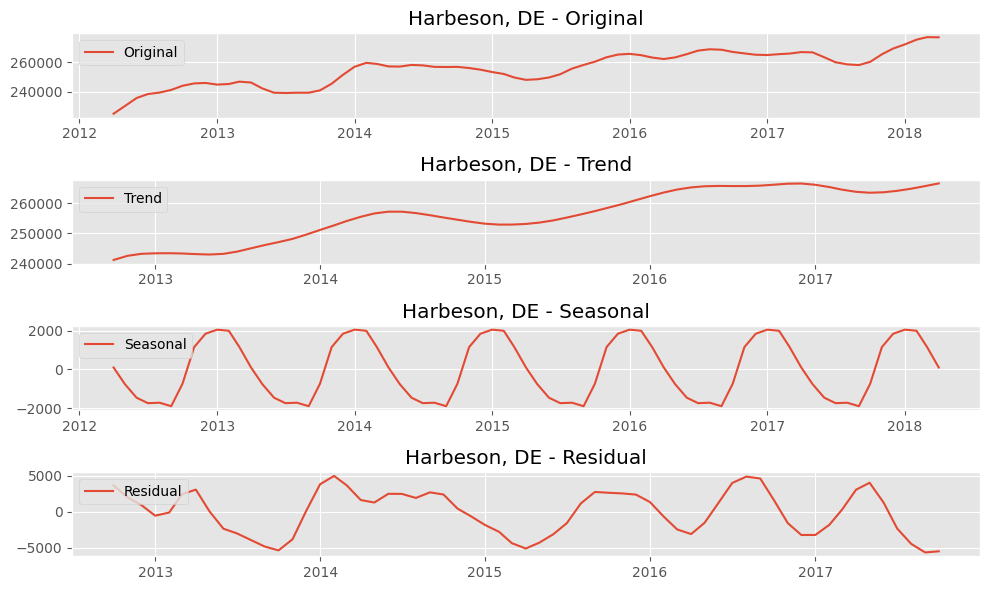

Seasonality: Old Fort, NC is Seasonal


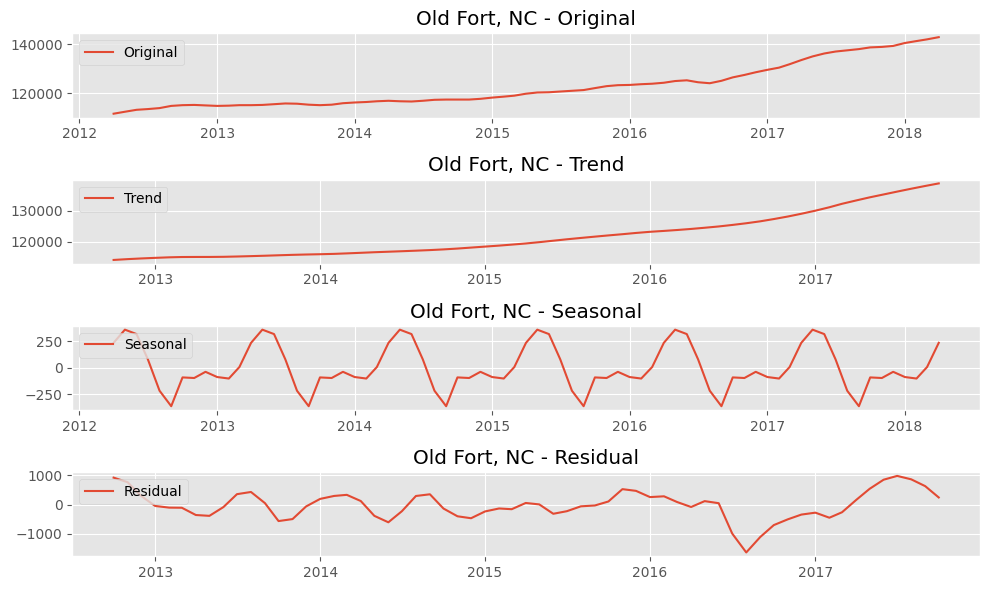

Seasonality: Fairmount, GA is Seasonal


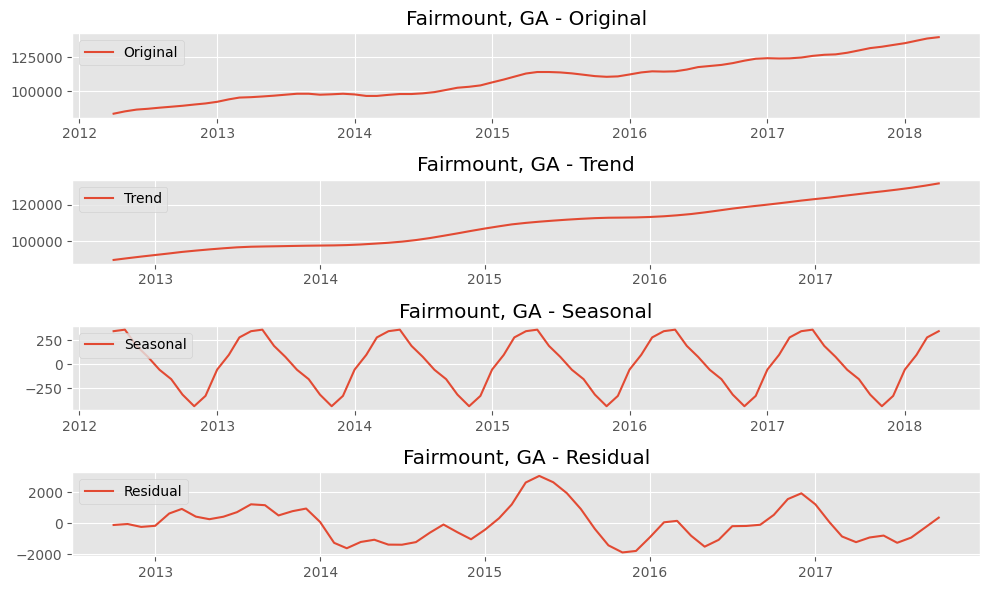

Seasonality: Atlanta, GA is Seasonal


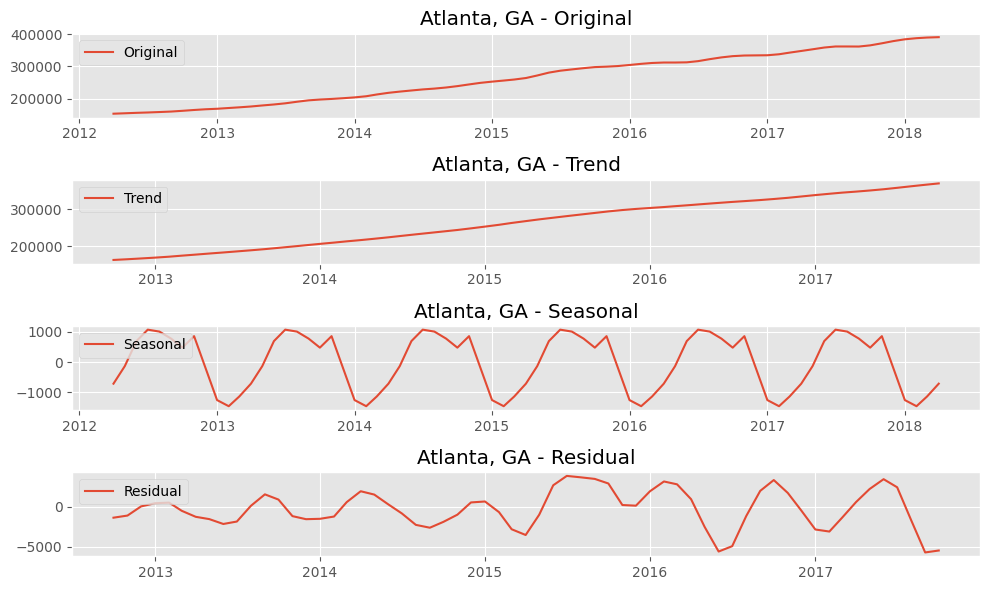

Seasonality: Jekyll Island, GA is Seasonal


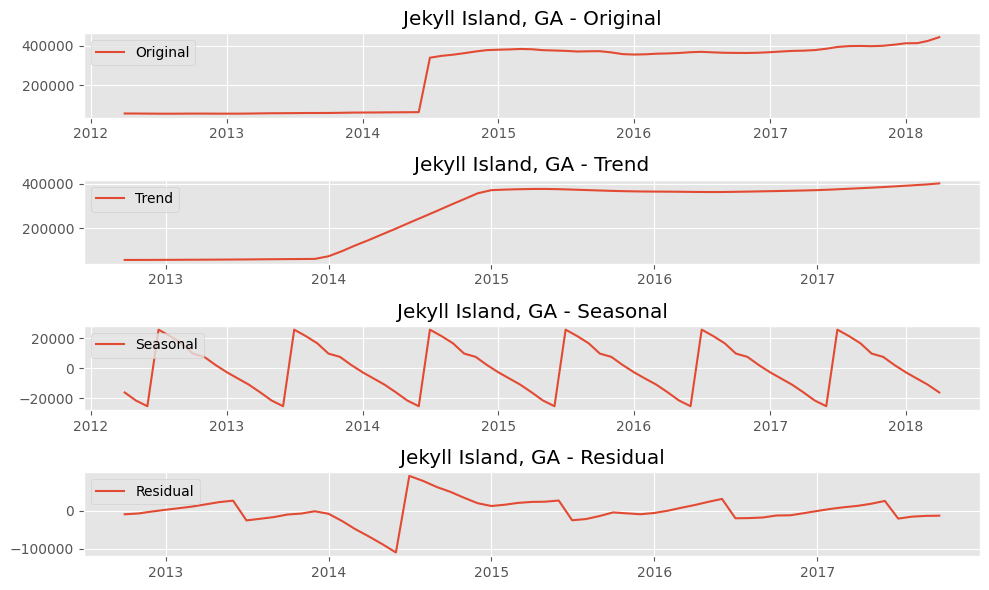

Seasonality: Decatur, TX is Seasonal


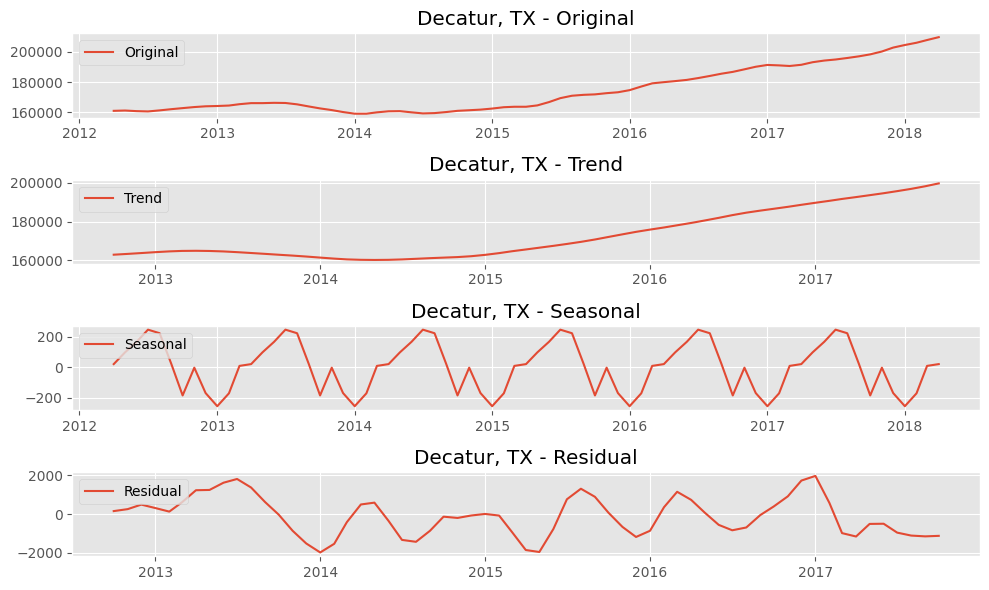

Seasonality: Austin, TX is Seasonal


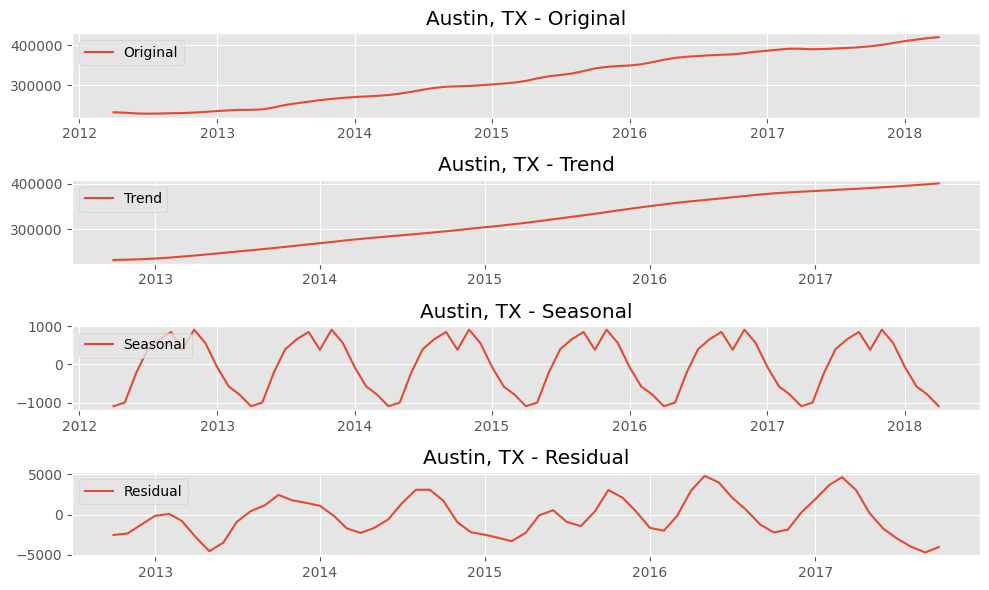

Seasonality: Soap Lake, WA is Seasonal


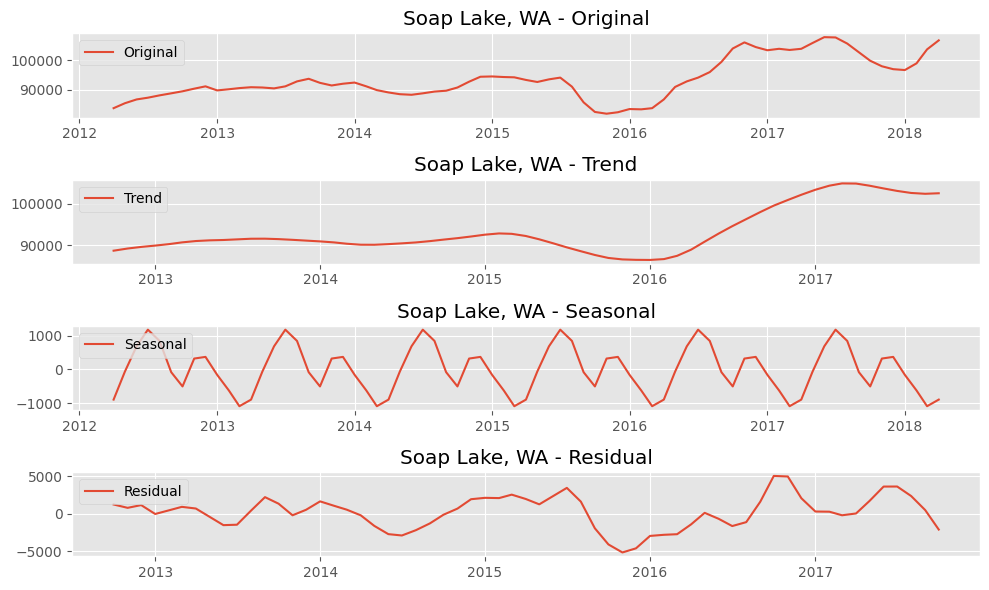

In [52]:
# Checking seasonality in each of the columns
for column in recent_time.columns:
    check_seasonality(column, recent_time[column])

**All zip codes show seasonality. This needs to be removed.**
- The following will remove seasonality and compare a few zip codes using line graphs.

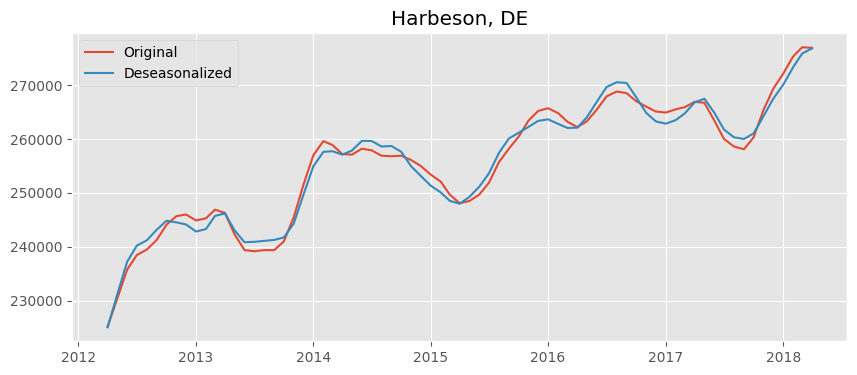

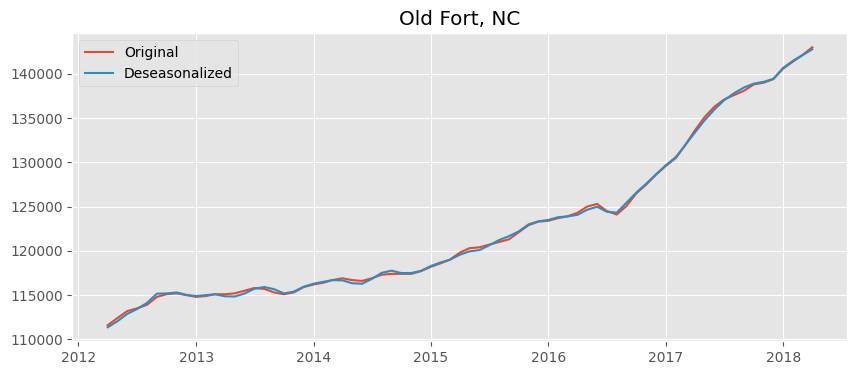

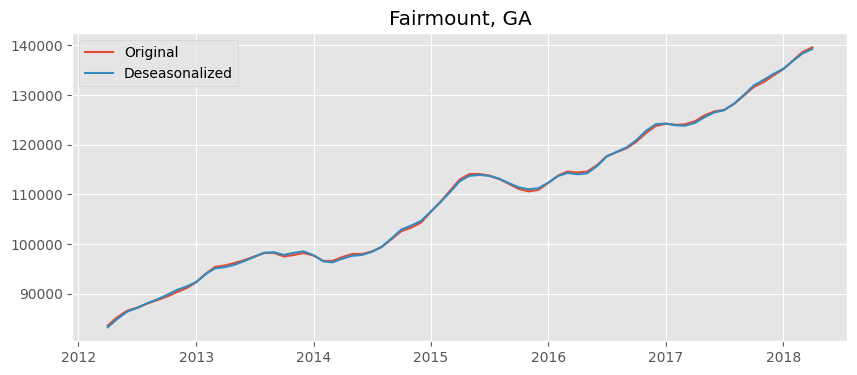

Harbeson, DE: Original Seasonal Std = 1491.2804499263245, Deseasonalized Seasonal Std = 1.158523070114787e-11
Old Fort, NC: Original Seasonal Std = 205.91118668118963, Deseasonalized Seasonal Std = 6.364545003654302e-12
Fairmount, GA: Original Seasonal Std = 261.01113331633087, Deseasonalized Seasonal Std = 9.023137261062124e-12


In [53]:
def remove_seasonality(column_series):
    decomposition = seasonal_decompose(column_series, model='additive', period=12)
    deseasonalized_series = column_series - decomposition.seasonal
    return deseasonalized_series

# Choose a few columns for comparison
columns_to_compare = ['Harbeson, DE', 'Old Fort, NC', 'Fairmount, GA']

# Create a new DataFrame to store deseasonalized data
deseasonalized_data = pd.DataFrame()

# Loop through each column in recent_time, remove seasonality, and store in the new DataFrame
for column in columns_to_compare:
    deseasonalized_data[column] = remove_seasonality(recent_time[column])

# Plot original and deseasonalized time series
for column in columns_to_compare:
    plt.figure(figsize=(10, 4))
    plt.plot(recent_time[column], label='Original')
    plt.plot(deseasonalized_data[column], label='Deseasonalized')
    plt.title(column)
    plt.legend()
    plt.show()

# Compare standard deviation of seasonal components
for column in columns_to_compare:
    original_decomposition = seasonal_decompose(recent_time[column], model='additive', period=12)
    deseasonalized_decomposition = seasonal_decompose(deseasonalized_data[column], model='additive', period=12)

    original_std = np.std(original_decomposition.seasonal)
    deseasonalized_std = np.std(deseasonalized_decomposition.seasonal)

    print(f"{column}: Original Seasonal Std = {original_std}, Deseasonalized Seasonal Std = {deseasonalized_std}")


### **5.1. Checking for Stationarity**
- The Augmented Dickey-Fuller (ADF) test will be used to determine the stationarity of the time series.
- The ADF test helps us assess whether a time series is stationary by comparing it to the null hypothesis that it has a unit root (meaning it's non-stationary).
- The test involves estimating the model's coefficients, calculating a test statistic, and comparing it to critical values to determine whether the null hypothesis can be rejected.
- The p-value resulting from the test indicates the strength of evidence against the null hypothesis.
     - If the p-value is less than or equal to the significance level of 0.05, there's evidence to reject the null hypothesis, suggesting the series is stationary.
     - If the p-value is greater than the significance level of 0.05, there's weak evidence to reject the null hypothesis, indicating the series is likely non-stationary.

In [54]:
def check_stationarity(data):
    def adf_test(timeseries):
        result = adfuller(timeseries, autolag='AIC')
        return result[1]  # Returning p-value

    print("Stationarity Check Results:")
    print()
    for column in data.columns:
        p_value = adf_test(data[column])
        stationary_status = "Stationary" if p_value <= 0.05 else "Not Stationary"
        print(f"{column}: ADF Test P-Value = {p_value:.4f} ({stationary_status})")

In [55]:
check_stationarity(recent_time)

Stationarity Check Results:

Harbeson, DE: ADF Test P-Value = 0.7320 (Not Stationary)
Old Fort, NC: ADF Test P-Value = 1.0000 (Not Stationary)
Fairmount, GA: ADF Test P-Value = 0.9979 (Not Stationary)
Atlanta, GA: ADF Test P-Value = 0.9291 (Not Stationary)
Jekyll Island, GA: ADF Test P-Value = 0.7651 (Not Stationary)
Decatur, TX: ADF Test P-Value = 0.9970 (Not Stationary)
Austin, TX: ADF Test P-Value = 0.9385 (Not Stationary)
Soap Lake, WA: ADF Test P-Value = 0.5802 (Not Stationary)


**Remove Stationarity Through Differencing**
- The stationarity check results show that the time series is not stationary.
- Next, differencing will be applied to remove stationarity and make the model-building process accurate and reliable.
- The data's statistical properties will remain consistent, allowing for meaningful insights and accurate predictions.

In [56]:
def remove_stationarity_through_differencing(column_series):
    # Apply differencing to make the data more stationary
    differenced_series = column_series.diff().dropna()

    # Plot original and differenced time series
    plt.figure(figsize=(10, 5))
    plt.plot(column_series, label='Original')
    plt.plot(differenced_series, label='Differenced')
    plt.legend()
    plt.title(f"{column_series.name} - Differenced vs. Original")
    plt.show()

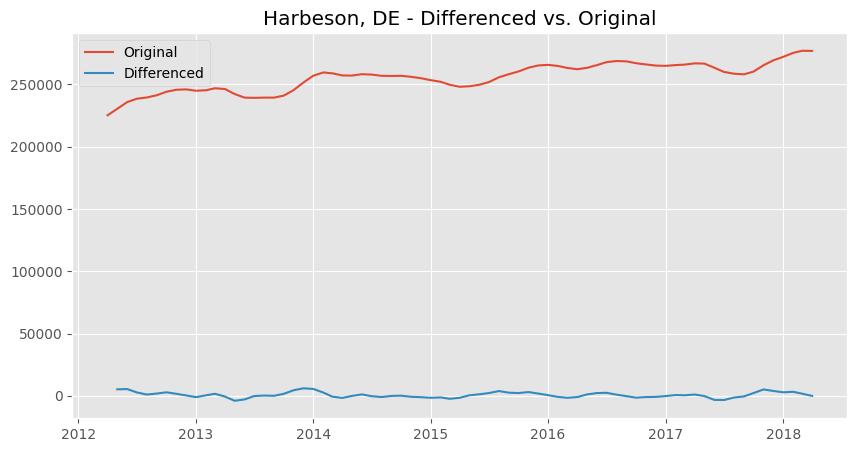

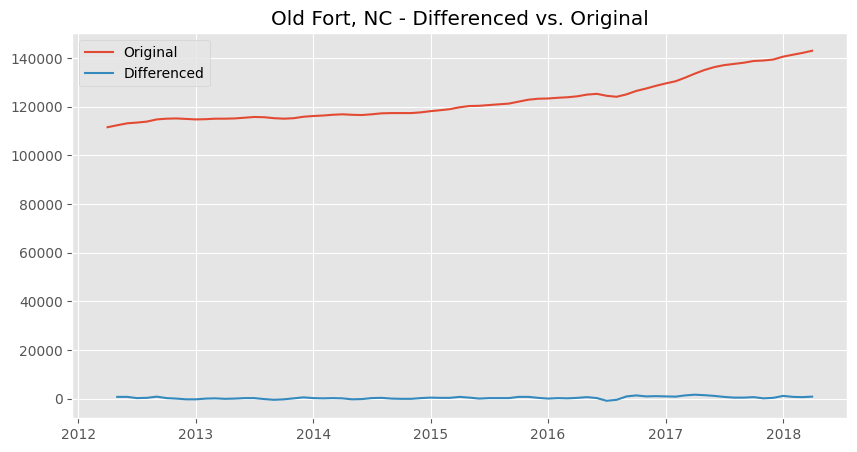

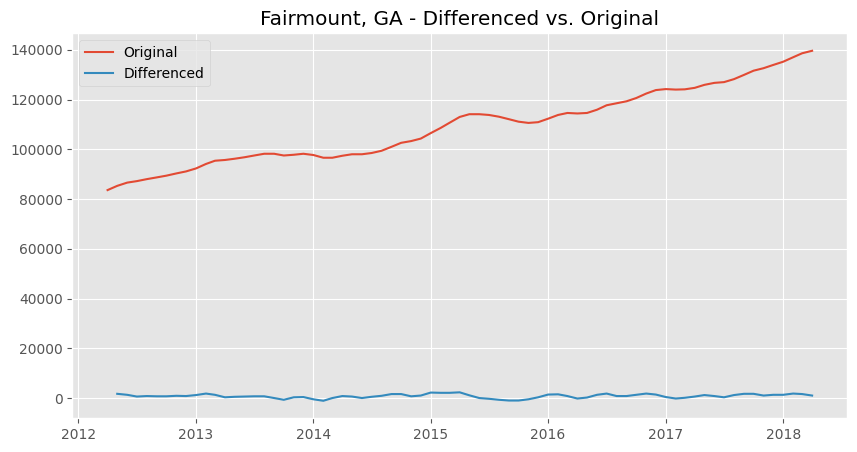

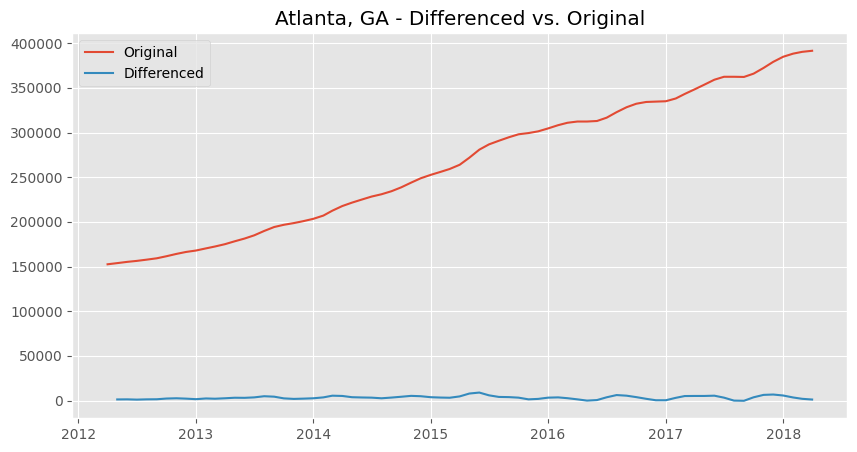

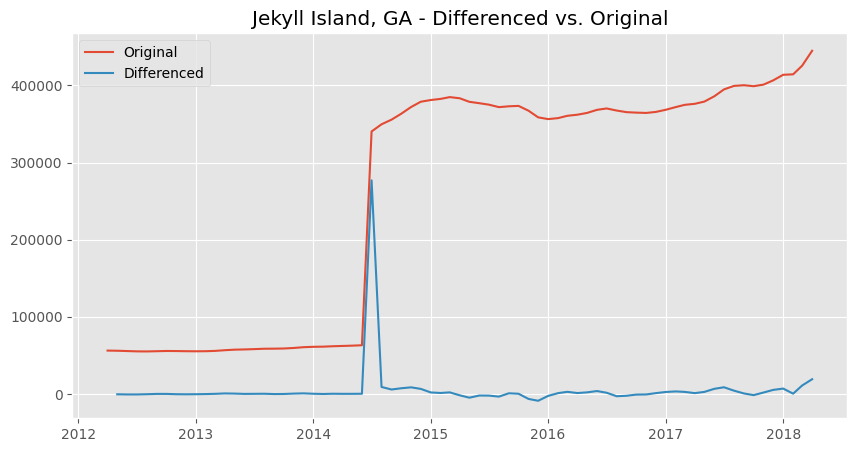

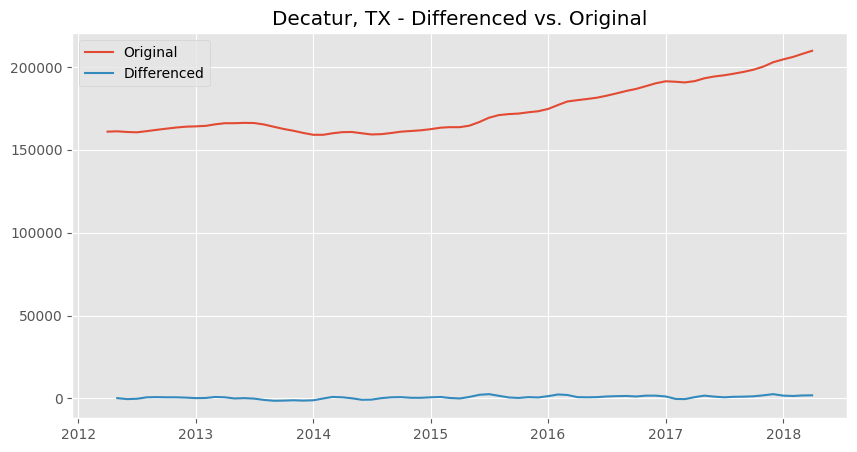

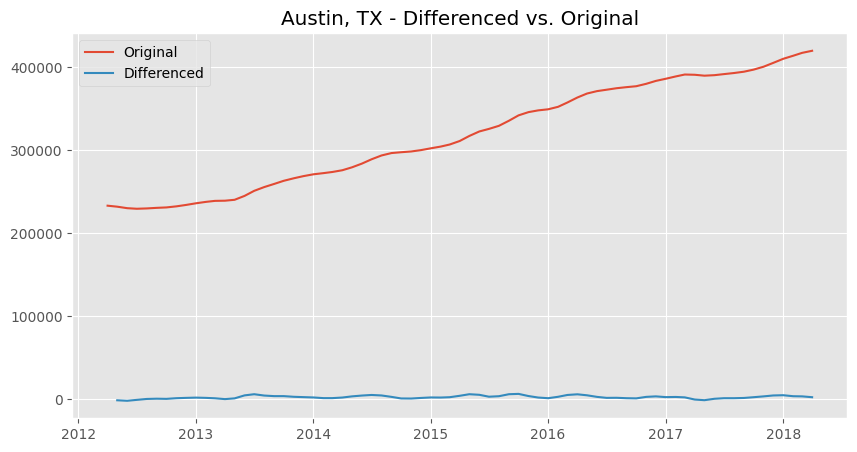

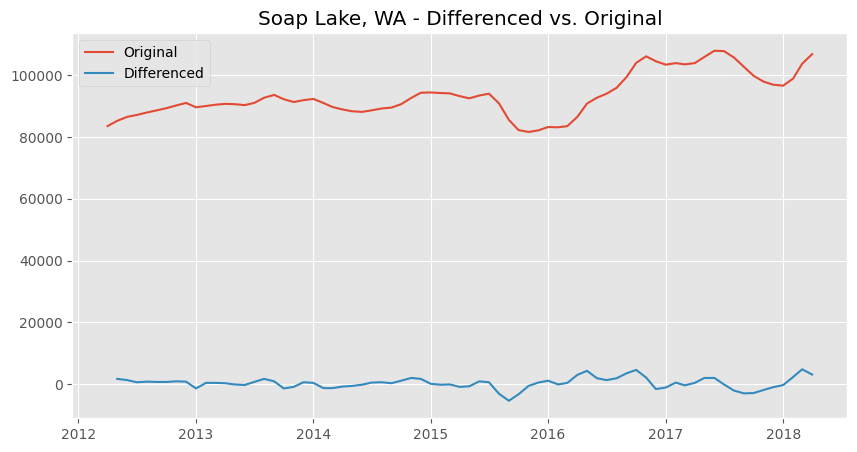

In [57]:
for column in recent_time.columns:
    remove_stationarity_through_differencing(recent_time[column])

In [58]:
differenced_series = recent_time.diff().dropna()

differenced_series

Harbeson, DE  Old Fort, NC  Fairmount, GA  Atlanta, GA  \
Time                                                                 
2012-05-01        5200.0         800.0         1700.0       1300.0   
2012-06-01        5400.0         800.0         1300.0       1400.0   
2012-07-01        2700.0         300.0          600.0       1100.0   
2012-08-01        1000.0         400.0          800.0       1400.0   
2012-09-01        1800.0         900.0          700.0       1500.0   
...                  ...           ...            ...          ...   
2017-12-01        3900.0         400.0         1300.0       6800.0   
2018-01-01        2800.0        1200.0         1300.0       5700.0   
2018-02-01        3200.0         800.0         1800.0       3500.0   
2018-03-01        1700.0         700.0         1600.0       2000.0   
2018-04-01        -100.0         900.0         1000.0       1200.0   

            Jekyll Island, GA  Decatur, TX  Austin, TX  Soap Lake, WA  
Time                                                                   
2012-05-01             -200.0        200.0     -1200.0         1700.0  
2012-06-01             -400.0       -400.0     -1800.0         1300.0  
2012-07-01             -400.0       -200.0      -700.0          600.0  
2012-08-01             -100.0        700.0       400.0          800.0  
2012-09-01              300.0        800.0       700.0          700.0  
...                       ...          ...         ...            ...  
2017-12-01             5500.0       2600.0      4600.0        -1000.0  
2018-01-01             7200.0       1700.0      4900.0         -300.0  
2018-02-01              600.0       1500.0      3700.0         2300.0  
2018-03-01            11200.0       1800.0      3500.0         4800.0  
2018-04-01            19300.0       1900.0      2500.0         3100.0  

[72 rows x 8 columns]

### **5.2 Autocorrelation and Partial Correlation of Differenced Series**
- Next, Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) will be used to identify the appropriate orders of autoregressive (AR) and moving average (MA) terms for modeling.
- The tools will guide in understanding the underlying structure of the time series, guiding the selection of model parameters, and ensuring that the model captures the relevant patterns in the data.
- They will help in building accurate and effective models.

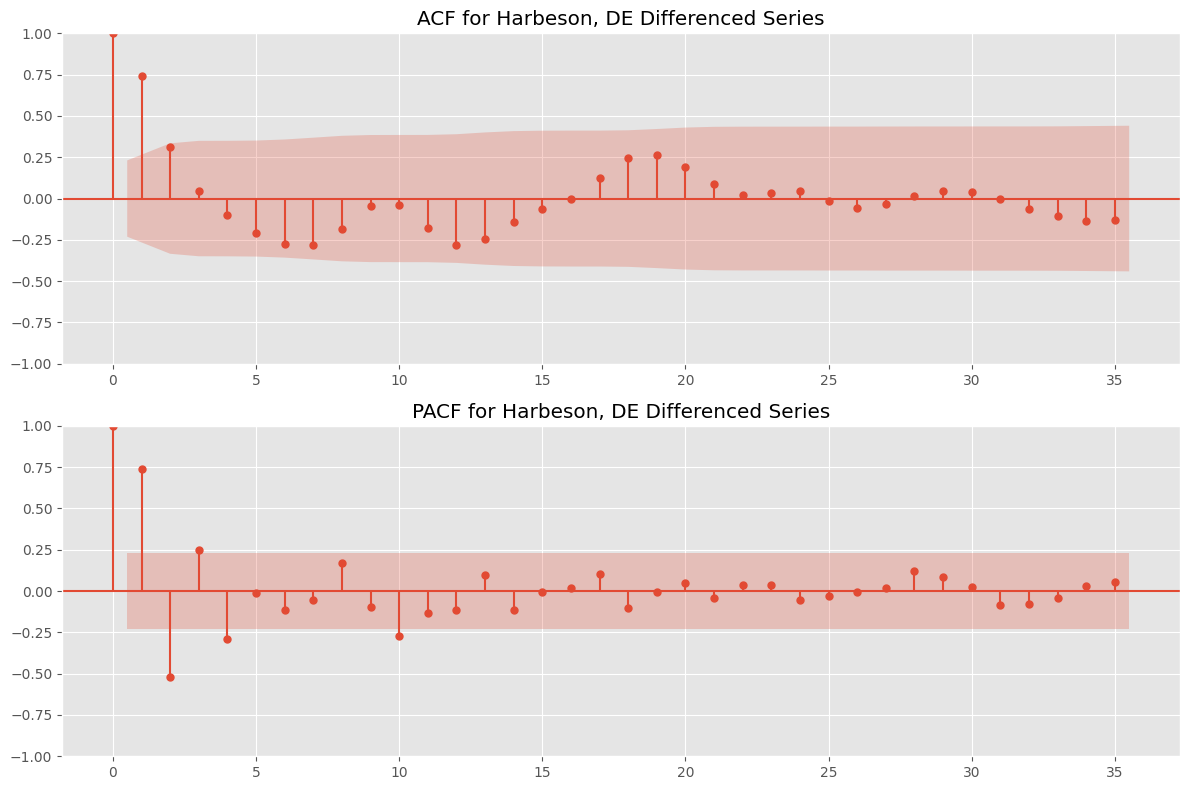

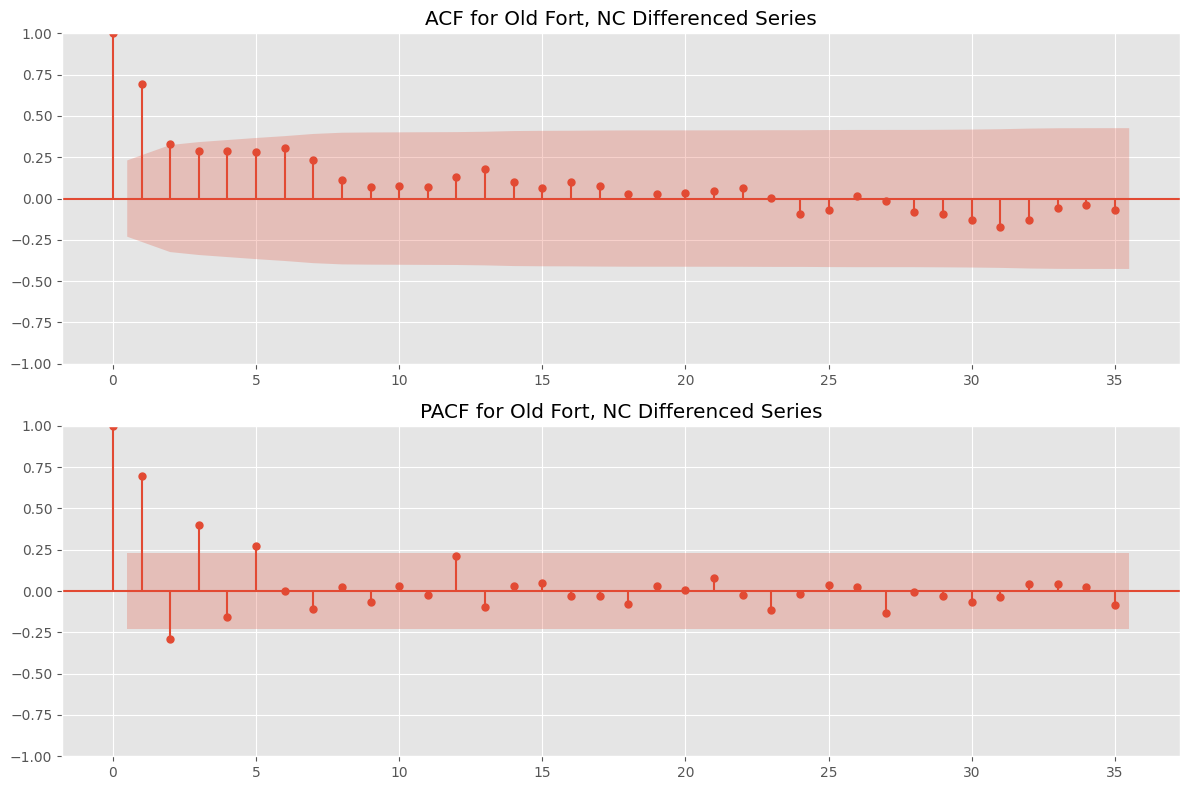

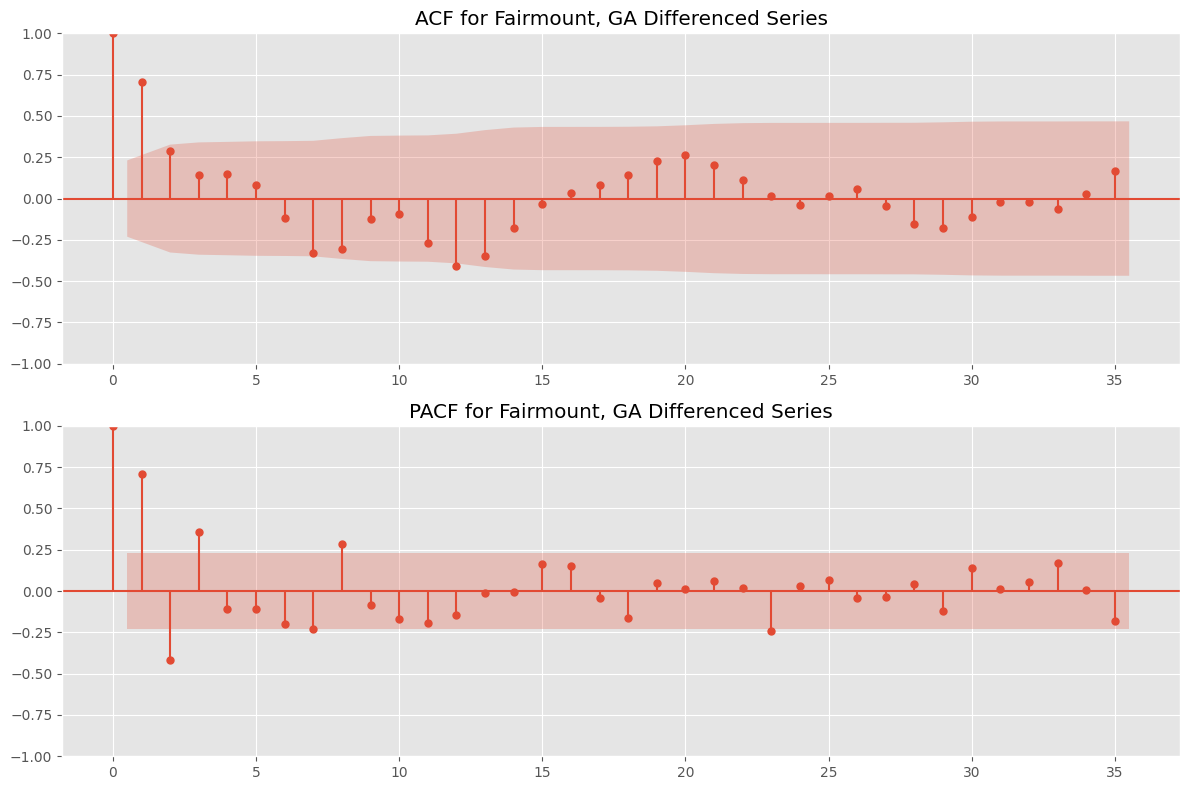

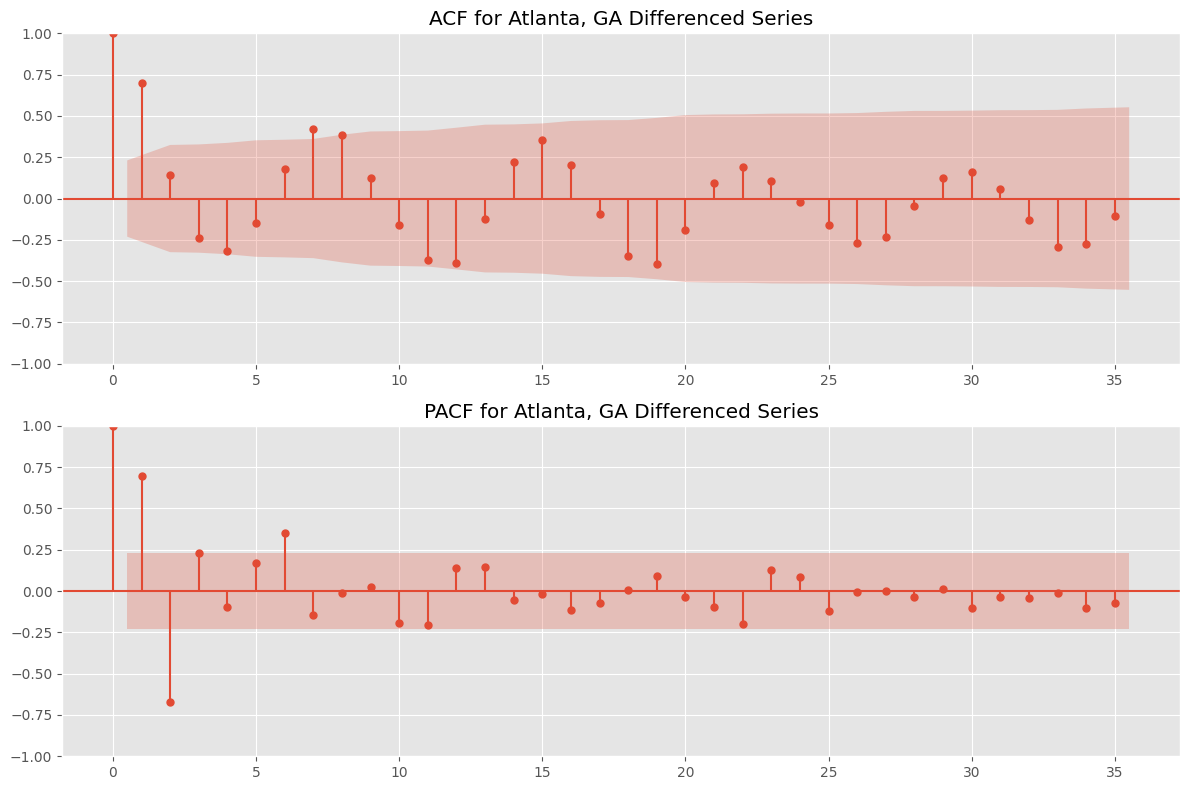

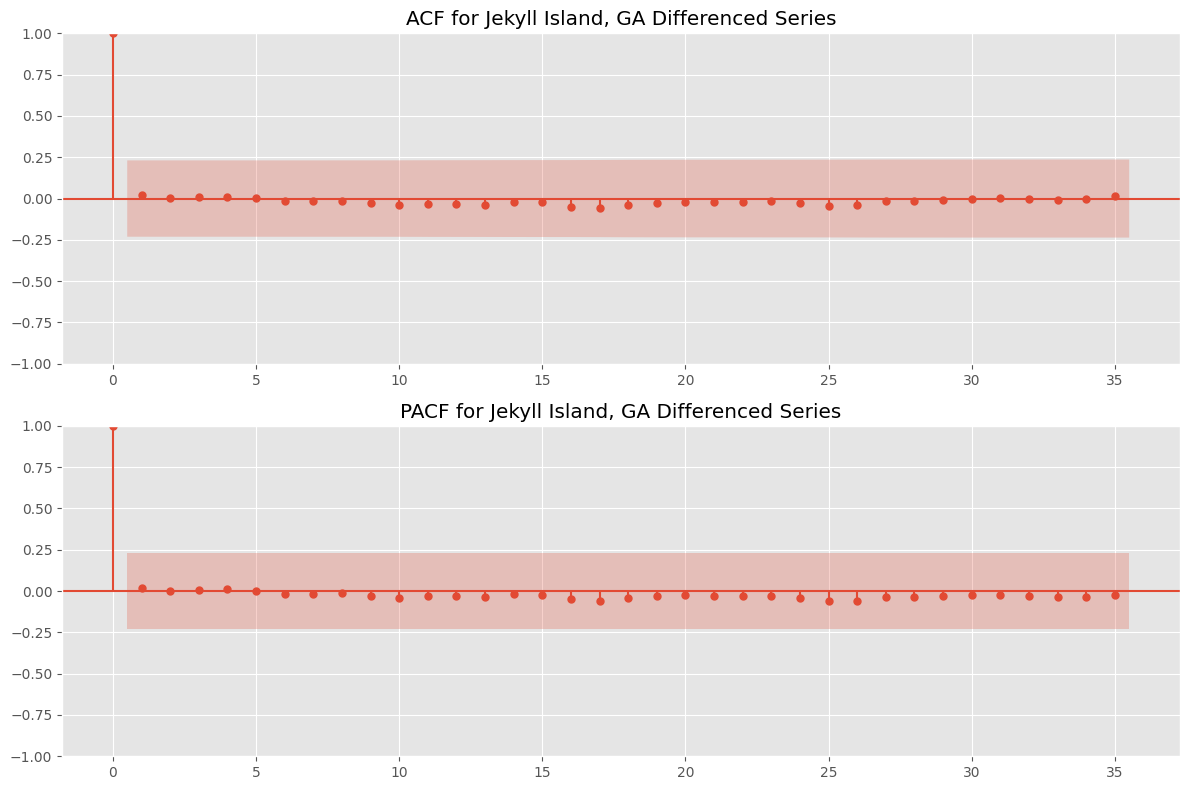

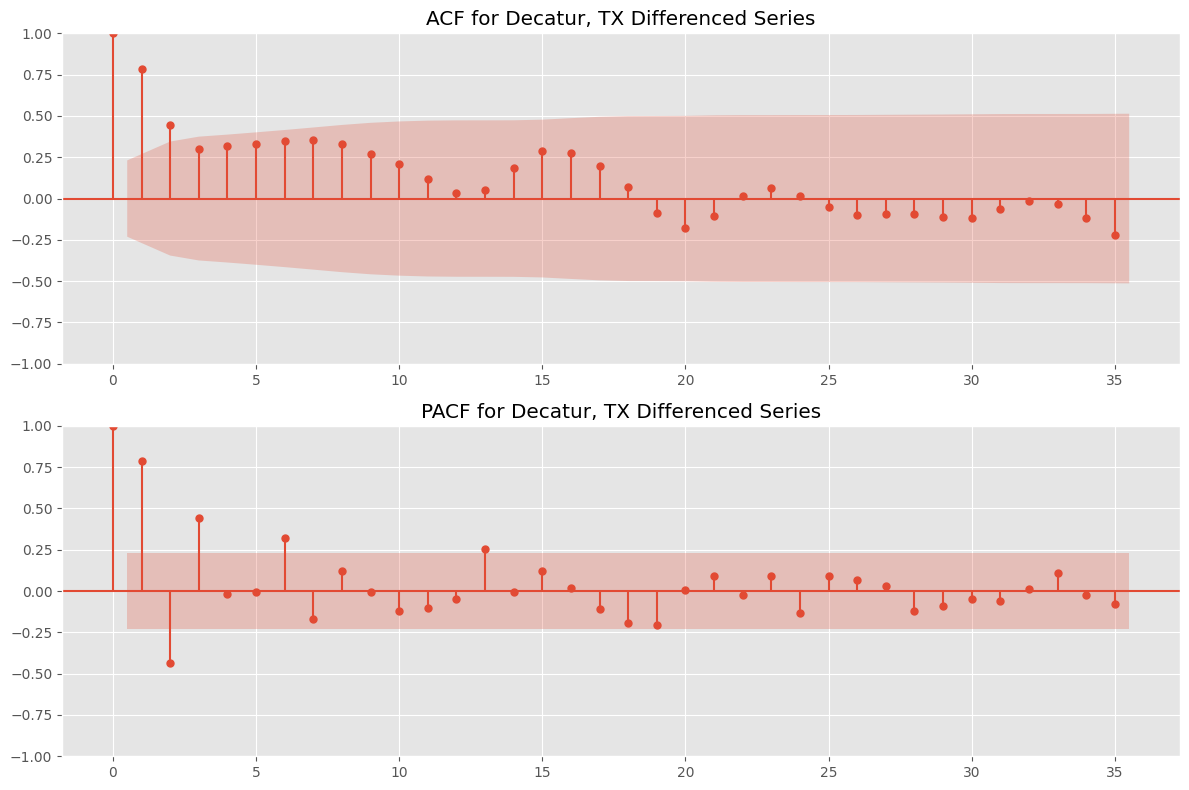

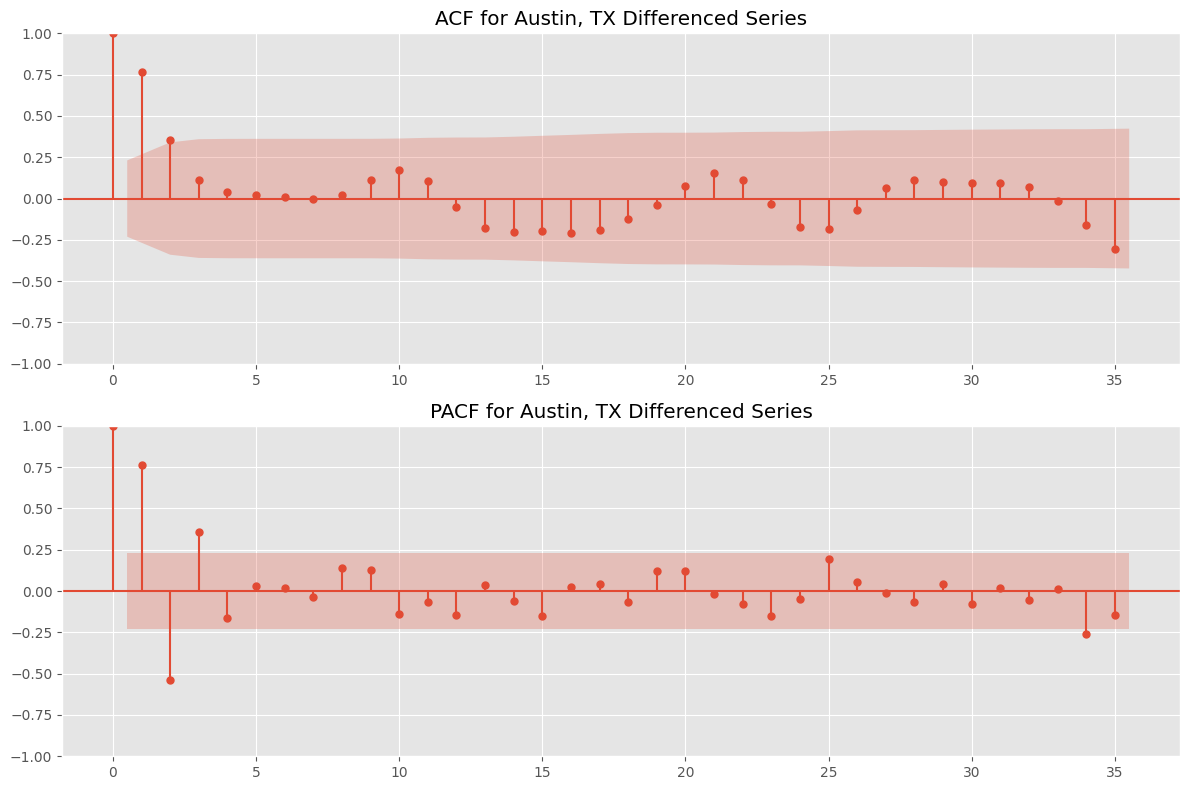

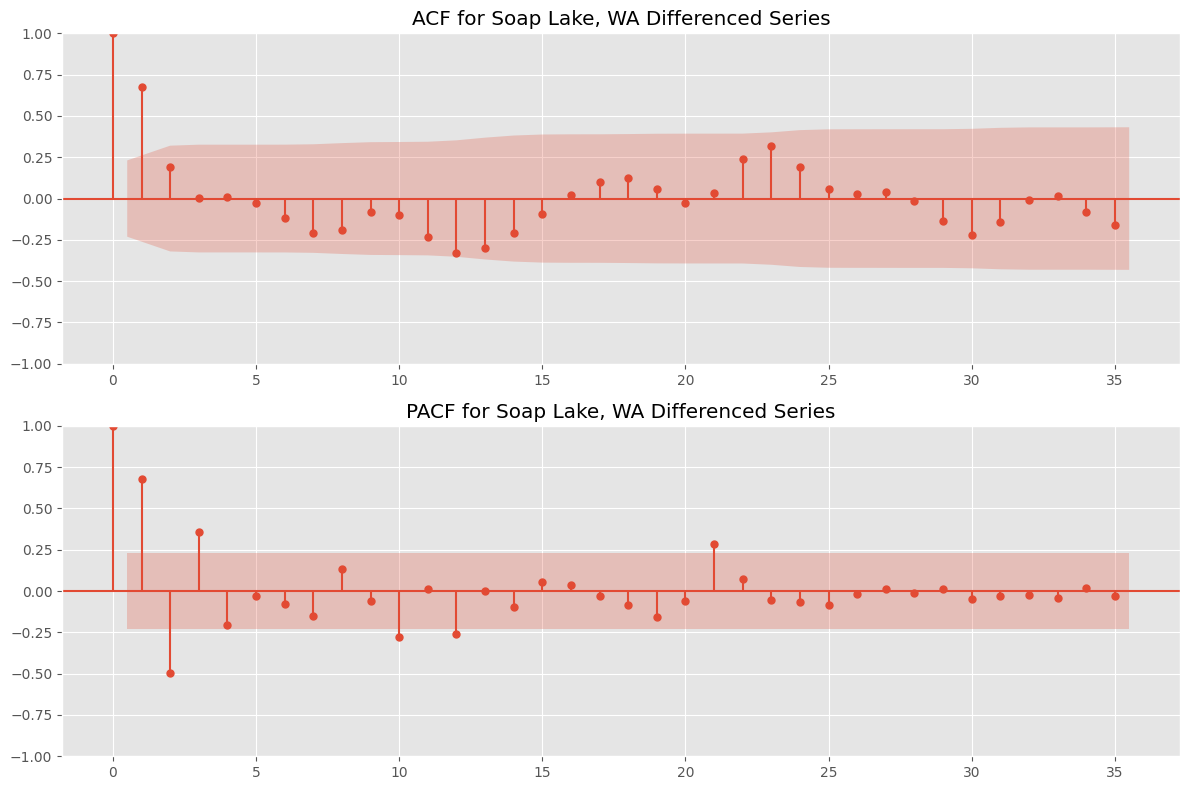

In [59]:
def plot_acf_pacf(series_diff, column_name):
    plt.figure(figsize=(12, 8))

    # acf
    plt.subplot(2, 1, 1)
    plot_acf(series_diff, ax=plt.gca(), lags=35)
    plt.title(f"ACF for {column_name} Differenced Series")

    # pacf
    plt.subplot(2, 1, 2)
    plot_pacf(series_diff, ax=plt.gca(), lags=35)
    plt.title(f"PACF for {column_name} Differenced Series")

    plt.tight_layout()
    plt.show()

# Call the function for all columns in recent_time
for column in recent_time.columns:
    differenced_series = recent_time[column].diff().dropna()
    plot_acf_pacf(differenced_series, column)

### **5.3. Performing Train Test Split**


- The data was split into train and test sets.
- The train set was 70% of the whole dataset and the test set was 30%.

In [60]:
# define train size
train_size = 0.7


split_index = round(len(recent_time) * train_size)
train = recent_time[:split_index]
test = recent_time[split_index:]

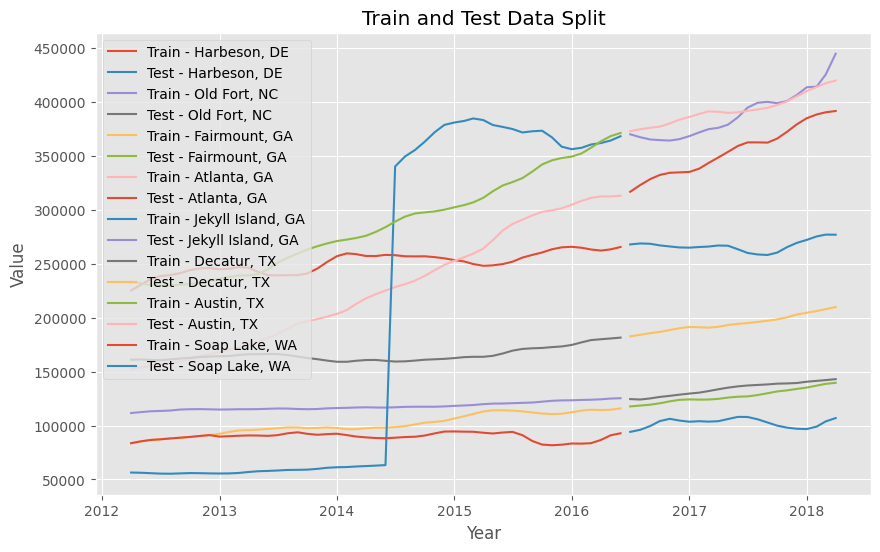

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

for column in train.columns:
    plt.plot(train[column], label=f'Train - {column}')
    plt.plot(test[column], label=f'Test - {column}')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Train and Test Data Split')
plt.legend()

plt.show()

## **6.0 Modelling**

### **a. Baseline Model: Using Approximate SARIMAX Parameters**
- Since our data has seasonality we use SARIMAX model.
- A SARIMAX model will be fitted for a random zip code as a baseline with params (0,0,0).

Randomly selected zip code: Austin, TX
Train set size: 51

Train set:
Summary for Austin, TX:
                               SARIMAX Results                                
Dep. Variable:             Austin, TX   No. Observations:                   73
Model:                        SARIMAX   Log Likelihood               -1029.838
Date:                Tue, 29 Aug 2023   AIC                           2061.677
Time:                        07:57:22   BIC                           2063.967
Sample:                    04-01-2012   HQIC                          2062.590
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.05e+11   6.52e+10      1.610      0.107   -2.28e+10    2.33e+11
Ljung-Box (L1) (Q):                  

<Figure size 1000x800 with 0 Axes>

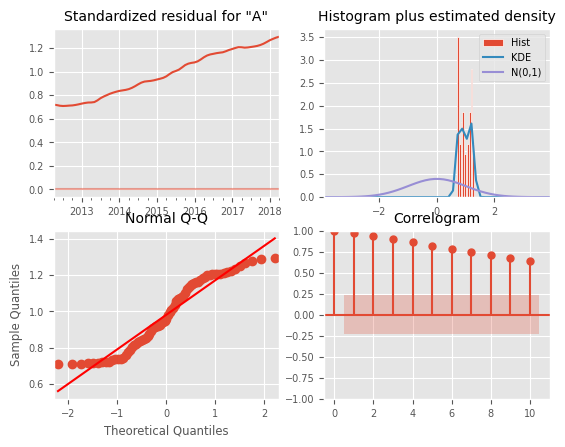

In [62]:
import random

# Randomly select a zip code
random_zipcode = random.choice(recent_time.columns)

# Calculate the train set size based on 70% of the data
train_set_size = int(len(recent_time) * train_size)

# Get the train set for the selected zip code
train_set = recent_time[random_zipcode].iloc[:train_set_size]

print(f"Randomly selected zip code: {random_zipcode}")
print(f"Train set size: {len(train_set)}")
print("\nTrain set:")
# print(train_set)

models = {}
for column in recent_time.columns:
    if column == random_zipcode:
        model = SARIMAX(recent_time[column], order=(0, 0, 0), seasonal_order=(0,0,0,0))
        models[column] = model.fit()

# Set font size for smaller text
plt.rcParams.update({'font.size': 7});

# Display summary and diagnostics for the selected model
for column, model in models.items():
    print(f"Summary for {column}:")
    print(model.summary())
    print("\nDiagnostics:")


    plt.figure(figsize=(10, 8))

    model.plot_diagnostics()
    plt.show()
    print("\n\n\n")

### **b. Pipeline - SARIMA Models for Each Zip Code**
A pipeline was then built to take care of:
1. Getting the best SARIMAX parameters
  - Auto-arima function was utilised to automate the process of obtaining (p, d, q) and (P, D, Q, s).
2. Fitting the SARIMAX model on the train set and diplaying the summary statistics
3. Predicting on the train set
4. Plotting original against forecasted values and displaying the confidence intervals to understand the uncertainty.
5. Calculating the Akaike Information Criterion (AIC) values that test the goodness of fit.
  - A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit.
6. Calculating RMSE to measure the model's accuracy 7.
7. Printing the results at the end of the pipeline.
8. Creating a dataframe containing RMSE and AIC for model diagnostics.

Eight (8) pipelines, one for each of the top zipcodes were displayed.

In [63]:
# setting up the pipeline's functions
def find_best_sarimax_params(series):
    model = auto_arima(series, seasonal=True, m=12, stepwise=True, trace=False) # 12 months
    p, d, q = model.order
    P, D, Q, s = model.seasonal_order
    return (p, d, q), (P, D, Q, s)

def fit_sarimax_and_get_summary(series, order, seasonal_order):
    try:
        model = sm.tsa.SARIMAX(series, order=order, seasonal_order=seasonal_order)
        results = model.fit()
        return results, results.summary()
    except:
        return None, f"Failed to fit SARIMAX for {series.name} (p, d, q): {order}"

def predict_sarimax(fitted_model, start, end):
    predicted = fitted_model.get_prediction(start=start, end=end)
    return predicted.predicted_mean


def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return rmse

def calculate_metrics(fitted_model, actual, predicted):
    rmse = calculate_rmse(actual, predicted)
    aic = fitted_model.aic
    metrics_df = pd.DataFrame({'RMSE': [rmse], 'AIC': [aic]}, index=[actual.name])
    return metrics_df

In [65]:
metrics_dfs = []

#### **Harbeson, DE**

PIPELINE - HARBESON, DE



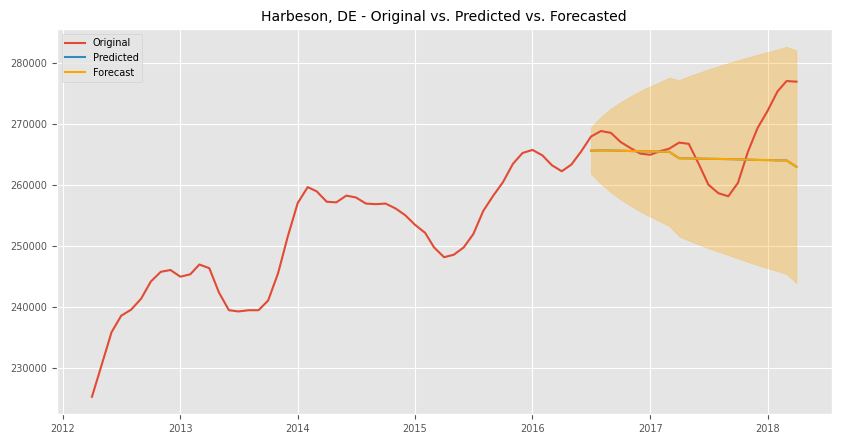

Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                         Harbeson, DE   No. Observations:                   51
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -451.039
Date:                              Tue, 29 Aug 2023   AIC                            912.078
Time:                                      07:59:53   BIC                            921.639
Sample:                                  04-01-2012   HQIC                           915.719
                                       - 06-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0317      0.032      1.003      0.316      -0.030       0.094
ar.L

In [67]:
column = 'Harbeson, DE'
series = recent_time[column]
train_set_column = train[column]
test_set_column = test[column]

print(f"PIPELINE - {column.upper()}")
print()
# best SARIMAX parameters
(p, d, q), (P, D, Q, s) = find_best_sarimax_params(series)

# Fit SARIMAX model on test set and get summary
fitted_model, model_summary = fit_sarimax_and_get_summary(train_set_column, (p, d, q), (P, D, Q, s))
if fitted_model is None:
    print("Failed to fit model:")
    print(model_summary)
    print("=" * 40)
else:
    # predicting
    predicted = predict_sarimax(fitted_model, start=test_set_column.index[0], end=test_set_column.index[-1])

    # Forecasting and visualizing
    forecast_steps = len(test)
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    # AIC calculation
    aic = fitted_model.aic

    # Plotting original against forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, label='Original')
    plt.plot(predicted.index, predicted.values, label='Predicted')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
    plt.legend()
    plt.title(f"{column} - Original vs. Predicted vs. Forecasted")
    plt.show()

    # RMSE calculation
    rmse = calculate_rmse(series[split_index:], predicted)

    # results
    print("Model Summary:")
    print(model_summary)
    print()
    print(f"AIC Value: {aic}")
    print(f"RMSE: {rmse}")
    print(f"SARIMAX Params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    print()

    # metrics dataframe
    metrics_df = calculate_metrics(fitted_model, series[split_index:], predicted)
    metrics_dfs.append(metrics_df)

#### **Old Fort, NC**

PIPELINE - OLD FORT, NC



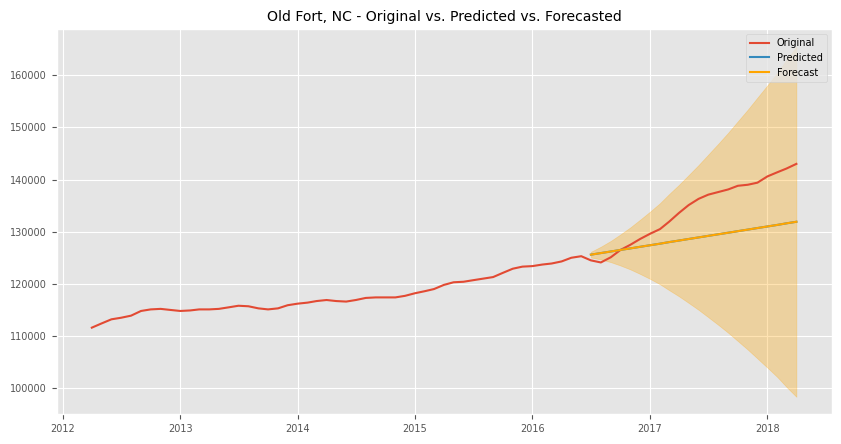

Model Summary:
                               SARIMAX Results                                
Dep. Variable:           Old Fort, NC   No. Observations:                   51
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -345.301
Date:                Tue, 29 Aug 2023   AIC                            692.603
Time:                        07:59:56   BIC                            694.495
Sample:                    04-01-2012   HQIC                           693.321
                         - 06-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.723e+04   2.04e+04      3.782      0.000    3.72e+04    1.17e+05
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.53
Prob(Q):                        

In [68]:
column = 'Old Fort, NC'
series = recent_time[column]
train_set_column = train[column]
test_set_column = test[column]

print(f"PIPELINE - {column.upper()}")
print()
# best SARIMAX parameters
(p, d, q), (P, D, Q, s) = find_best_sarimax_params(series)

# Fit SARIMAX model on test set and get summary
fitted_model, model_summary = fit_sarimax_and_get_summary(train_set_column, (p, d, q), (P, D, Q, s))
if fitted_model is None:
    print("Failed to fit model:")
    print(model_summary)
    print("=" * 40)
else:
    # predicting
    predicted = predict_sarimax(fitted_model, start=test_set_column.index[0], end=test_set_column.index[-1])

    # Forecasting and visualizing
    forecast_steps = len(test)
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    # AIC calculation
    aic = fitted_model.aic

    # Plotting original against forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, label='Original')
    plt.plot(predicted.index, predicted.values, label='Predicted')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
    plt.legend()
    plt.title(f"{column} - Original vs. Predicted vs. Forecasted")
    plt.show()

    # RMSE calculation
    rmse = calculate_rmse(series[split_index:], predicted)

    # results
    print("Model Summary:")
    print(model_summary)
    print()
    print(f"AIC Value: {aic}")
    print(f"RMSE: {rmse}")
    print(f"SARIMAX Params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    print()

    # metrics dataframe
    metrics_df = calculate_metrics(fitted_model, series[split_index:], predicted)
    metrics_dfs.append(metrics_df)

#### **Fairmount, GA**

PIPELINE - FAIRMOUNT, GA



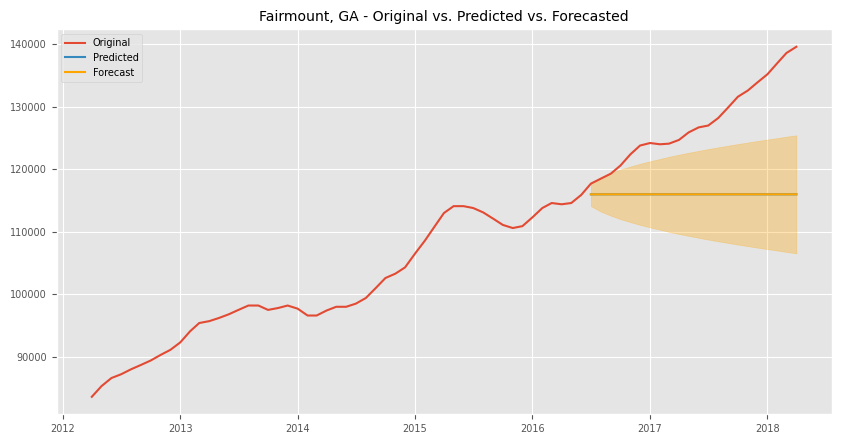

Model Summary:
                               SARIMAX Results                                
Dep. Variable:          Fairmount, GA   No. Observations:                   51
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -415.866
Date:                Tue, 29 Aug 2023   AIC                            835.732
Time:                        08:00:03   BIC                            839.556
Sample:                    04-01-2012   HQIC                           837.189
                         - 06-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.025      2.731      0.006       0.019       0.116
sigma2      9.223e+05   2.21e+05      4.182      0.000     4.9e+05    1.35e+06
Ljung-Box (L1) (Q):                  

In [69]:
column = 'Fairmount, GA'
series = recent_time[column]
train_set_column = train[column]
test_set_column = test[column]

print(f"PIPELINE - {column.upper()}")
print()
# best SARIMAX parameters
(p, d, q), (P, D, Q, s) = find_best_sarimax_params(series)

# Fit SARIMAX model on test set and get summary
fitted_model, model_summary = fit_sarimax_and_get_summary(train_set_column, (p, d, q), (P, D, Q, s))
if fitted_model is None:
    print("Failed to fit model:")
    print(model_summary)
    print("=" * 40)
else:
    # predicting
    predicted = predict_sarimax(fitted_model, start=test_set_column.index[0], end=test_set_column.index[-1])

    # Forecasting and visualizing
    forecast_steps = len(test)
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    # AIC calculation
    aic = fitted_model.aic

    # Plotting original against forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, label='Original')
    plt.plot(predicted.index, predicted.values, label='Predicted')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
    plt.legend()
    plt.title(f"{column} - Original vs. Predicted vs. Forecasted")
    plt.show()

    # RMSE calculation
    rmse = calculate_rmse(series[split_index:], predicted)

    # results
    print("Model Summary:")
    print(model_summary)
    print()
    print(f"AIC Value: {aic}")
    print(f"RMSE: {rmse}")
    print(f"SARIMAX Params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    print()

    # metrics dataframe
    metrics_df = calculate_metrics(fitted_model, series[split_index:], predicted)
    metrics_dfs.append(metrics_df)

#### **Atlanta, GA**

PIPELINE - ATLANTA, GA



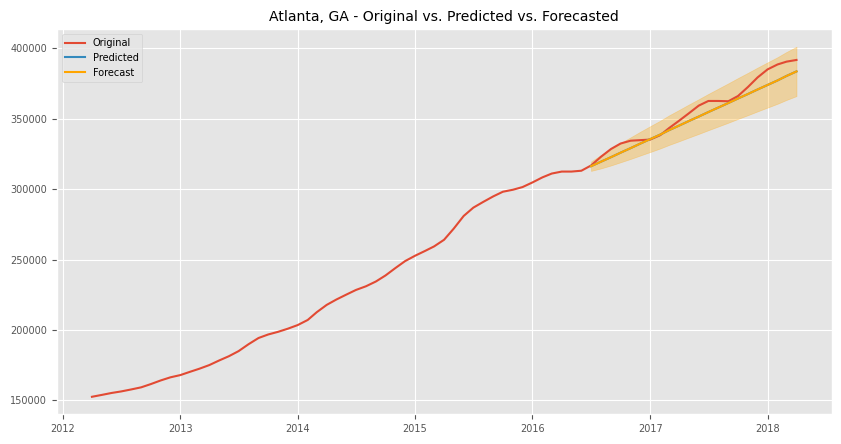

Model Summary:
                               SARIMAX Results                                
Dep. Variable:            Atlanta, GA   No. Observations:                   51
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -443.178
Date:                Tue, 29 Aug 2023   AIC                            892.356
Time:                        08:00:15   BIC                            898.092
Sample:                    04-01-2012   HQIC                           894.540
                         - 06-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.79e-05   2.64e+04      0.000       1.000       1.000
ma.L1         -0.9998      0.007   -143.176      0.000      -1.014      -0.986
sigma2       2.88e+06   2.14e-11   1.

In [70]:
column = 'Atlanta, GA'
series = recent_time[column]
train_set_column = train[column]
test_set_column = test[column]

print(f"PIPELINE - {column.upper()}")
print()
# best SARIMAX parameters
(p, d, q), (P, D, Q, s) = find_best_sarimax_params(series)

# Fit SARIMAX model on test set and get summary
fitted_model, model_summary = fit_sarimax_and_get_summary(train_set_column, (p, d, q), (P, D, Q, s))
if fitted_model is None:
    print("Failed to fit model:")
    print(model_summary)
    print("=" * 40)
else:
    # predicting
    predicted = predict_sarimax(fitted_model, start=test_set_column.index[0], end=test_set_column.index[-1])

    # Forecasting and visualizing
    forecast_steps = len(test)
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    # AIC calculation
    aic = fitted_model.aic

    # Plotting original against forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, label='Original')
    plt.plot(predicted.index, predicted.values, label='Predicted')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
    plt.legend()
    plt.title(f"{column} - Original vs. Predicted vs. Forecasted")
    plt.show()

    # RMSE calculation
    rmse = calculate_rmse(series[split_index:], predicted)

    # results
    print("Model Summary:")
    print(model_summary)
    print()
    print(f"AIC Value: {aic}")
    print(f"RMSE: {rmse}")
    print(f"SARIMAX Params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    print()

    # metrics dataframe
    metrics_df = calculate_metrics(fitted_model, series[split_index:], predicted)
    metrics_dfs.append(metrics_df)

#### **Jekyll Island, GA**

PIPELINE - JEKYLL ISLAND, GA



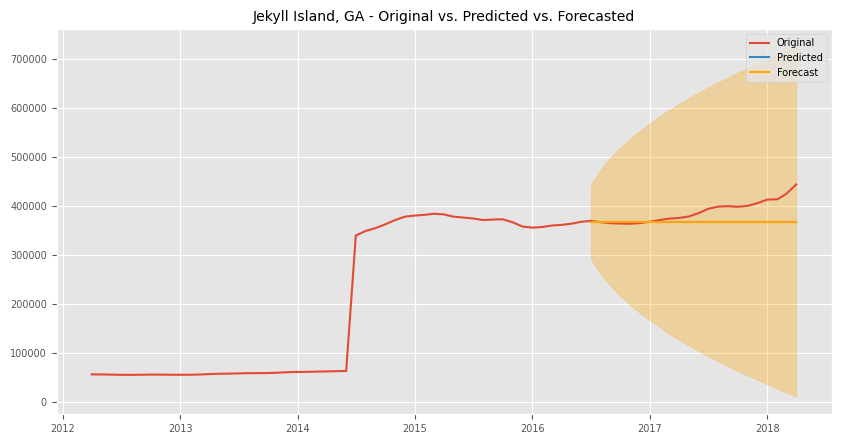

Model Summary:
                               SARIMAX Results                                
Dep. Variable:      Jekyll Island, GA   No. Observations:                   51
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -599.889
Date:                Tue, 29 Aug 2023   AIC                           1201.779
Time:                        08:00:17   BIC                           1203.691
Sample:                    04-01-2012   HQIC                          1202.507
                         - 06-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.514e+09   6.04e+07     25.072      0.000     1.4e+09    1.63e+09
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4490.49
Prob(Q):                        

In [71]:
column = 'Jekyll Island, GA'
series = recent_time[column]
train_set_column = train[column]
test_set_column = test[column]

print(f"PIPELINE - {column.upper()}")
print()
# best SARIMAX parameters
(p, d, q), (P, D, Q, s) = find_best_sarimax_params(series)

# Fit SARIMAX model on test set and get summary
fitted_model, model_summary = fit_sarimax_and_get_summary(train_set_column, (p, d, q), (P, D, Q, s))
if fitted_model is None:
    print("Failed to fit model:")
    print(model_summary)
    print("=" * 40)
else:
    # predicting
    predicted = predict_sarimax(fitted_model, start=test_set_column.index[0], end=test_set_column.index[-1])

    # Forecasting and visualizing
    forecast_steps = len(test)
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    # AIC calculation
    aic = fitted_model.aic

    # Plotting original against forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, label='Original')
    plt.plot(predicted.index, predicted.values, label='Predicted')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
    plt.legend()
    plt.title(f"{column} - Original vs. Predicted vs. Forecasted")
    plt.show()

    # RMSE calculation
    rmse = calculate_rmse(series[split_index:], predicted)

    # results
    print("Model Summary:")
    print(model_summary)
    print()
    print(f"AIC Value: {aic}")
    print(f"RMSE: {rmse}")
    print(f"SARIMAX Params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    print()

    # metrics dataframe
    metrics_df = calculate_metrics(fitted_model, series[split_index:], predicted)
    metrics_dfs.append(metrics_df)

#### **Decatur, TX**

PIPELINE - DECATUR, TX



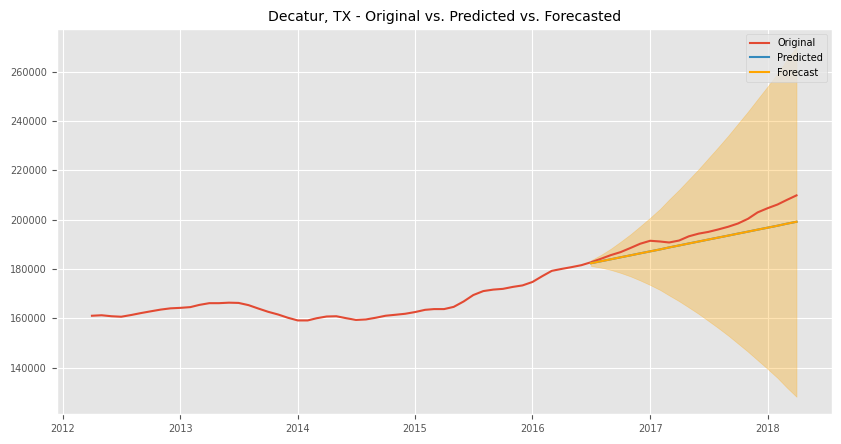

Model Summary:
                               SARIMAX Results                                
Dep. Variable:            Decatur, TX   No. Observations:                   51
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -381.986
Date:                Tue, 29 Aug 2023   AIC                            765.971
Time:                        08:00:20   BIC                            767.863
Sample:                    04-01-2012   HQIC                           766.689
                         - 06-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.453e+05   7.75e+04      4.458      0.000    1.94e+05    4.97e+05
Ljung-Box (L1) (Q):                   6.02   Jarque-Bera (JB):                 0.42
Prob(Q):                        

In [72]:
column = 'Decatur, TX'
series = recent_time[column]
train_set_column = train[column]
test_set_column = test[column]

print(f"PIPELINE - {column.upper()}")
print()
# best SARIMAX parameters
(p, d, q), (P, D, Q, s) = find_best_sarimax_params(series)

# Fit SARIMAX model on test set and get summary
fitted_model, model_summary = fit_sarimax_and_get_summary(train_set_column, (p, d, q), (P, D, Q, s))
if fitted_model is None:
    print("Failed to fit model:")
    print(model_summary)
    print("=" * 40)
else:
    # predicting
    predicted = predict_sarimax(fitted_model, start=test_set_column.index[0], end=test_set_column.index[-1])

    # Forecasting and visualizing
    forecast_steps = len(test)
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    # AIC calculation
    aic = fitted_model.aic

    # Plotting original against forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, label='Original')
    plt.plot(predicted.index, predicted.values, label='Predicted')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
    plt.legend()
    plt.title(f"{column} - Original vs. Predicted vs. Forecasted")
    plt.show()

    # RMSE calculation
    rmse = calculate_rmse(series[split_index:], predicted)

    # results
    print("Model Summary:")
    print(model_summary)
    print()
    print(f"AIC Value: {aic}")
    print(f"RMSE: {rmse}")
    print(f"SARIMAX Params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    print()

    # metrics dataframe
    metrics_df = calculate_metrics(fitted_model, series[split_index:], predicted)
    metrics_dfs.append(metrics_df)

#### **Austin, TX**

PIPELINE - AUSTIN, TX



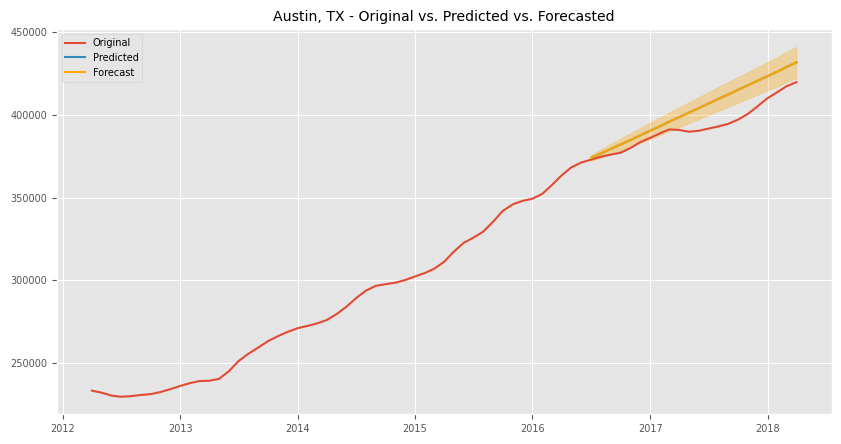

Model Summary:
                                      SARIMAX Results                                      
Dep. Variable:                          Austin, TX   No. Observations:                   51
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -499.407
Date:                             Tue, 29 Aug 2023   AIC                           1006.815
Time:                                     08:00:35   BIC                           1014.463
Sample:                                 04-01-2012   HQIC                          1009.727
                                      - 06-01-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001    813.335      0.000       0.997       1.002
ma.L1       

In [73]:
column = 'Austin, TX'
series = recent_time[column]
train_set_column = train[column]
test_set_column = test[column]

print(f"PIPELINE - {column.upper()}")
print()
# best SARIMAX parameters
(p, d, q), (P, D, Q, s) = find_best_sarimax_params(series)

# Fit SARIMAX model on test set and get summary
fitted_model, model_summary = fit_sarimax_and_get_summary(train_set_column, (p, d, q), (P, D, Q, s))
if fitted_model is None:
    print("Failed to fit model:")
    print(model_summary)
    print("=" * 40)
else:
    # predicting
    predicted = predict_sarimax(fitted_model, start=test_set_column.index[0], end=test_set_column.index[-1])

    # Forecasting and visualizing
    forecast_steps = len(test)
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    # AIC calculation
    aic = fitted_model.aic

    # Plotting original against forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, label='Original')
    plt.plot(predicted.index, predicted.values, label='Predicted')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
    plt.legend()
    plt.title(f"{column} - Original vs. Predicted vs. Forecasted")
    plt.show()

    # RMSE calculation
    rmse = calculate_rmse(series[split_index:], predicted)

    # results
    print("Model Summary:")
    print(model_summary)
    print()
    print(f"AIC Value: {aic}")
    print(f"RMSE: {rmse}")
    print(f"SARIMAX Params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    print()

    # metrics dataframe
    metrics_df = calculate_metrics(fitted_model, series[split_index:], predicted)
    metrics_dfs.append(metrics_df)

#### **Soap Lake, WA**

PIPELINE - SOAP LAKE, WA



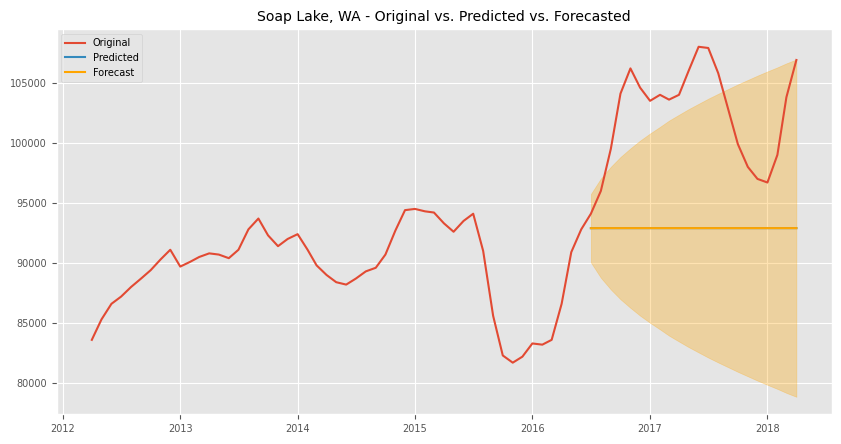

Model Summary:
                               SARIMAX Results                                
Dep. Variable:          Soap Lake, WA   No. Observations:                   51
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -435.542
Date:                Tue, 29 Aug 2023   AIC                            875.084
Time:                        08:00:41   BIC                            878.908
Sample:                    04-01-2012   HQIC                           876.541
                         - 06-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0510      0.031      1.653      0.098      -0.009       0.111
sigma2      2.111e+06   2.82e+05      7.481      0.000    1.56e+06    2.66e+06
Ljung-Box (L1) (Q):                  

In [74]:
column = 'Soap Lake, WA'
series = recent_time[column]
train_set_column = train[column]
test_set_column = test[column]

print(f"PIPELINE - {column.upper()}")
print()
# best SARIMAX parameters
(p, d, q), (P, D, Q, s) = find_best_sarimax_params(series)

# Fit SARIMAX model on test set and get summary
fitted_model, model_summary = fit_sarimax_and_get_summary(train_set_column, (p, d, q), (P, D, Q, s))
if fitted_model is None:
    print("Failed to fit model:")
    print(model_summary)
    print("=" * 40)
else:
    # predicting
    predicted = predict_sarimax(fitted_model, start=test_set_column.index[0], end=test_set_column.index[-1])

    # Forecasting and visualizing
    forecast_steps = len(test)
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    # AIC calculation
    aic = fitted_model.aic

    # Plotting original against forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values, label='Original')
    plt.plot(predicted.index, predicted.values, label='Predicted')
    plt.plot(test.index, forecast, label='Forecast', color='orange')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
    plt.legend()
    plt.title(f"{column} - Original vs. Predicted vs. Forecasted")
    plt.show()

    # RMSE calculation
    rmse = calculate_rmse(series[split_index:], predicted)

    # results
    print("Model Summary:")
    print(model_summary)
    print()
    print(f"AIC Value: {aic}")
    print(f"RMSE: {rmse}")
    print(f"SARIMAX Params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")
    print()

    # metrics dataframe
    metrics_df = calculate_metrics(fitted_model, series[split_index:], predicted)
    metrics_dfs.append(metrics_df)

### **c. SARIMA Model Diagnostics**
The results below indicate that as per SARIMA model, the top five zip codes with the lowest RMSE values are
1. Decatur, TX - 5033.433673
2. Harbeson, DE - 5753.477978    
3. Atlanta, GA - 6154.167274     
4. Old Fort, NC - 6779.883346      
5. Soap Lake, WA - 10254.866297   

In [75]:
final_metrics_df = pd.concat(metrics_dfs)
final_metrics_df = final_metrics_df.sort_values(by='RMSE')
print(final_metrics_df)

                           RMSE          AIC
Decatur, TX         5033.433673   765.971035
Harbeson, DE        5753.477978   912.078435
Harbeson, DE        5753.477978   912.078435
Atlanta, GA         6154.167274   892.355686
Old Fort, NC        6779.883346   692.602794
Soap Lake, WA      10254.866297   875.084354
Austin, TX         11318.298431  1006.814736
Fairmount, GA      13161.083951   835.732403
Jekyll Island, GA  30178.717667  1201.778543


### **d. Facebook Prophet**
- The first step was to prepare the data for the model.

In [76]:
recent_time.head()

Harbeson, DE  Old Fort, NC  Fairmount, GA  Atlanta, GA  \
Time                                                                 
2012-04-01      225200.0      111600.0        83600.0     152600.0   
2012-05-01      230400.0      112400.0        85300.0     153900.0   
2012-06-01      235800.0      113200.0        86600.0     155300.0   
2012-07-01      238500.0      113500.0        87200.0     156400.0   
2012-08-01      239500.0      113900.0        88000.0     157800.0   

            Jekyll Island, GA  Decatur, TX  Austin, TX  Soap Lake, WA  
Time                                                                   
2012-04-01            56400.0     161000.0    233200.0        83600.0  
2012-05-01            56200.0     161200.0    232000.0        85300.0  
2012-06-01            55800.0     160800.0    230200.0        86600.0  
2012-07-01            55400.0     160600.0    229500.0        87200.0  
2012-08-01            55300.0     161300.0    229900.0        88000.0

### **e. Facebook Prophet Pipeline**
- The pipeline was built to create a DataFrame from a copy of the working DataFrame, `recent_time`. Here, the `ds` column was defined
- It then calculates some metrics that will be used as part of diagnostics.
- The `prophet_model` function changes the zip  code column to y, creates a subset, resets index, fits, forecasts and predicts using Facebook Prophet library.

In [77]:
# Create a new DataFrame and rename the column
prophet_df = recent_time.copy()
prophet_df = pd.DataFrame(prophet_df).reset_index()
prophet_df = prophet_df.rename(columns={'Time': 'ds'})

def calculate_rmse(actual, predicted):
    return mean_squared_error(actual, predicted, squared=False)

def calculate_metrics(actual, predicted):
    rmse = calculate_rmse(actual, predicted)
    metrics_df = pd.DataFrame({'RMSE': [rmse]}, index=[actual.name])
    return metrics_df

def prophet_model(column_name):
    new_subset = prophet_df.rename(columns={column_name: 'y'})

    subset_columns = ['ds', 'y']
    prophet_subset = new_subset[subset_columns]

    prophet_subset_reset = prophet_subset.reset_index(drop=True)

    model = Prophet(interval_width=0.95)
    fitted_model = model.fit(prophet_subset_reset)

    future_dates = model.make_future_dataframe(periods=36, freq='MS')
    forecast = model.predict(future_dates)

    # Print and plot the results
    print(f"Results for {column_name}:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

    # Plot the forecast and components
    model.plot(forecast, uncertainty=True)
    model.plot_components(forecast)
    plt.show()

    actual = prophet_subset['y']
    predicted = forecast['yhat'][-len(actual):]

    fb_metrics_df = calculate_metrics(actual, predicted)

    return actual, predicted, fb_metrics_df

In [91]:
fb_metrics_dfs = []

#### **Harbeson, DE - Facebook Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/xye_bjle.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/y8c3zc99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2450', 'data', 'file=/tmp/tmpvvruqi_m/xye_bjle.json', 'init=/tmp/tmpvvruqi_m/y8c3zc99.json', 'output', 'file=/tmp/tmpvvruqi_m/prophet_models3ot1f7x/prophet_model-20230829081939.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Harbeson, DE:
            ds           yhat     yhat_lower     yhat_upper
104 2020-12-01  281930.505718  272409.190510  291197.980661
105 2021-01-01  282797.324224  273635.204924  292674.047776
106 2021-02-01  283967.807956  273745.664371  292615.210249
107 2021-03-01  283683.652055  274365.195613  293233.143268
108 2021-04-01  280348.194125  270881.923183  289758.043052


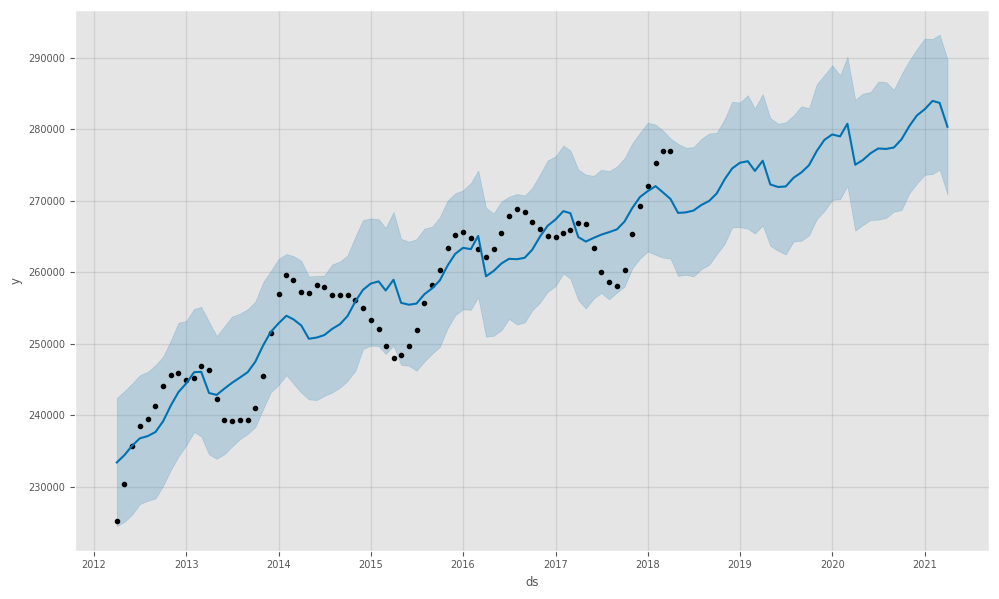

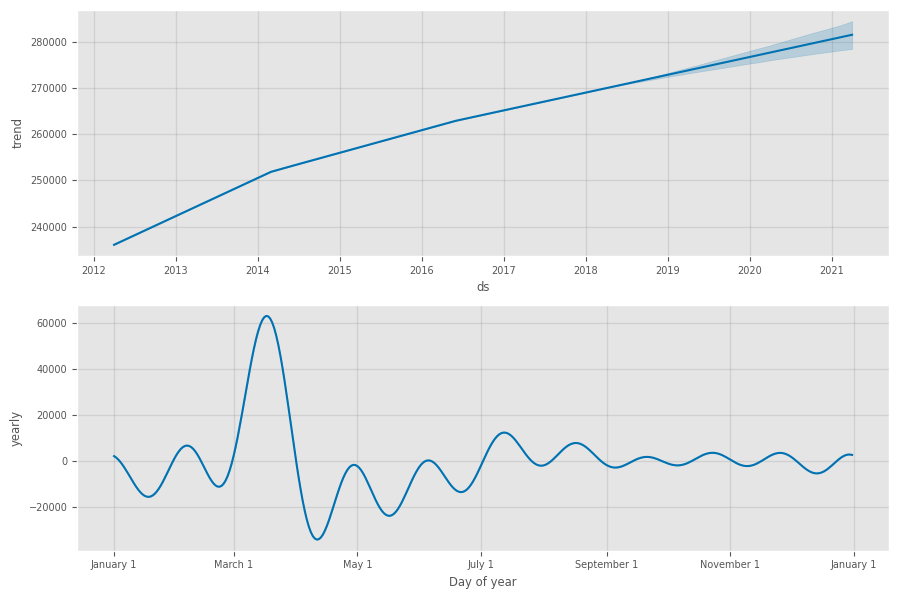

In [92]:
actual, predicted, metrics_df = prophet_model('Harbeson, DE')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

#### **Old Fort, NC - Facebook Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/1ike8mn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/qrl8tit9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20782', 'data', 'file=/tmp/tmpvvruqi_m/1ike8mn1.json', 'init=/tmp/tmpvvruqi_m/qrl8tit9.json', 'output', 'file=/tmp/tmpvvruqi_m/prophet_modeliddr9b0k/prophet_model-20230829081941.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:19:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Old Fort, NC:
            ds           yhat     yhat_lower     yhat_upper
104 2020-12-01  171224.610829  145712.658148  199451.934944
105 2021-01-01  172099.957409  145253.649584  201671.810070
106 2021-02-01  173056.189679  145072.988813  204093.717513
107 2021-03-01  174040.377966  144881.347818  206535.991004
108 2021-04-01  175247.798776  144912.276098  208917.461308


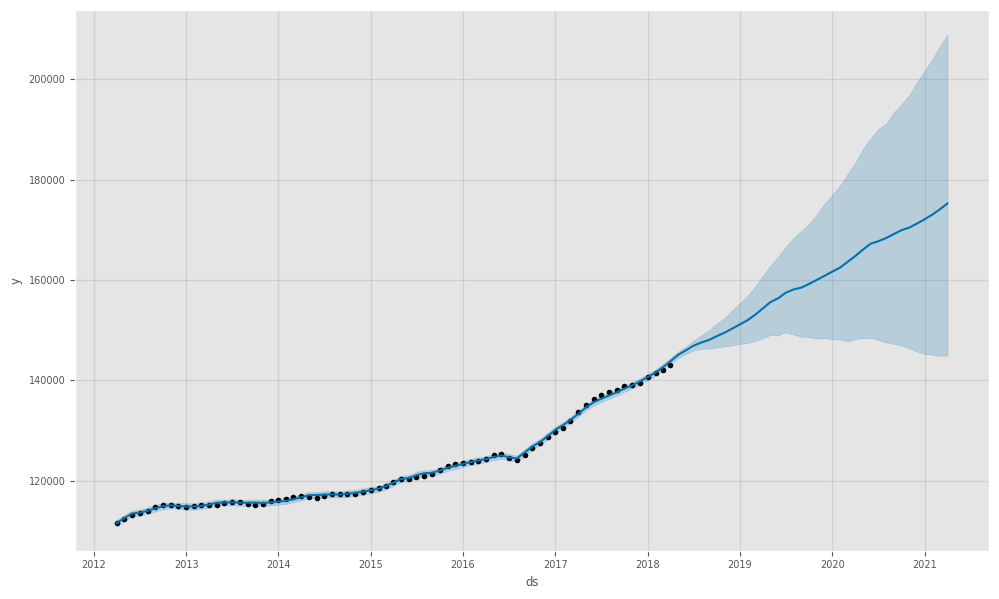

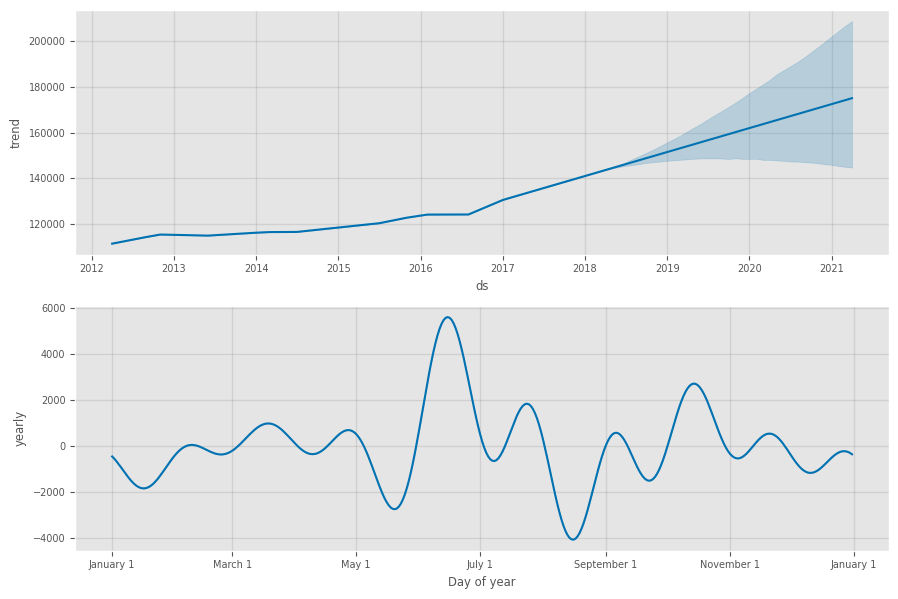

In [93]:
actual, predicted, metrics_df = prophet_model('Old Fort, NC')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

#### **Fairmount, GA - Facebook Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/35nsggh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/r5vvqg11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8871', 'data', 'file=/tmp/tmpvvruqi_m/35nsggh4.json', 'init=/tmp/tmpvvruqi_m/r5vvqg11.json', 'output', 'file=/tmp/tmpvvruqi_m/prophet_modeltkzzk9en/prophet_model-20230829081943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Fairmount, GA:
            ds           yhat     yhat_lower     yhat_upper
104 2020-12-01  170306.212011  137230.547079  203129.720679
105 2021-01-01  171257.611669  136478.124553  205916.384310
106 2021-02-01  172263.899868  137262.013307  208587.511391
107 2021-03-01  173914.067007  137178.542303  211056.564606
108 2021-04-01  174434.880565  138303.904161  213289.353727


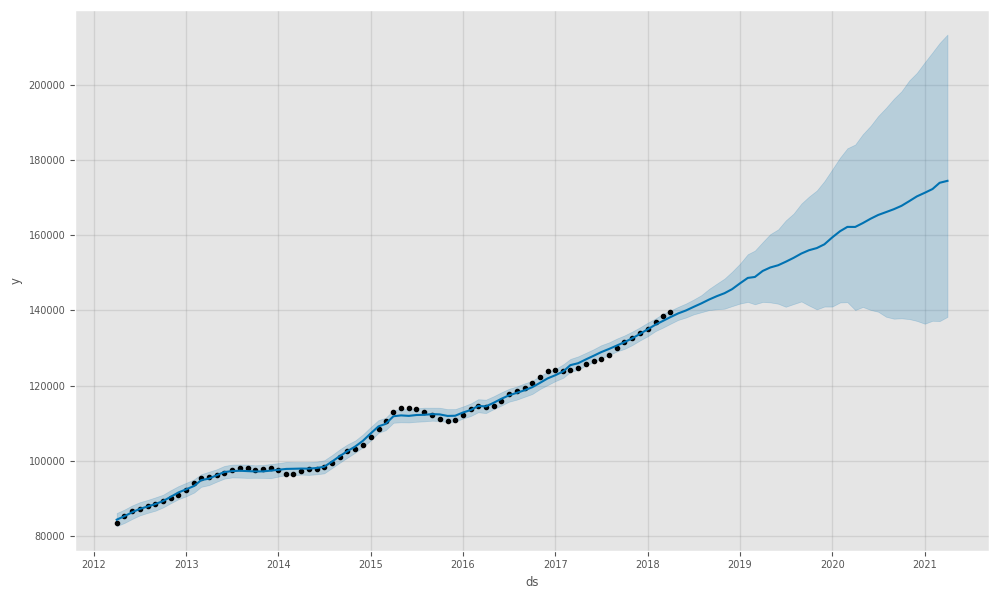

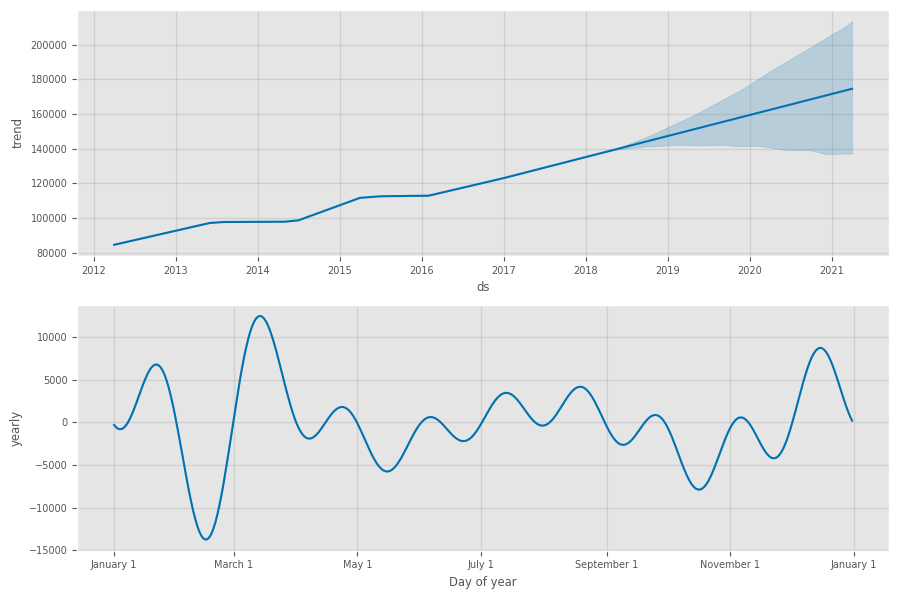

In [94]:
actual, predicted, metrics_df = prophet_model('Fairmount, GA')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

#### **Atlanta, GA - Facebook Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/6n_7un4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/5pddg4tk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5963', 'data', 'file=/tmp/tmpvvruqi_m/6n_7un4n.json', 'init=/tmp/tmpvvruqi_m/5pddg4tk.json', 'output', 'file=/tmp/tmpvvruqi_m/prophet_modelb9j9u6kr/prophet_model-20230829081945.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Atlanta, GA:
            ds           yhat     yhat_lower     yhat_upper
104 2020-12-01  512127.261799  458275.114020  564684.110677
105 2021-01-01  514624.956280  458953.557135  569372.488744
106 2021-02-01  517818.717241  458590.499727  575565.572666
107 2021-03-01  523207.929895  461741.885410  583275.413771
108 2021-04-01  526920.828579  461534.054557  589707.045075


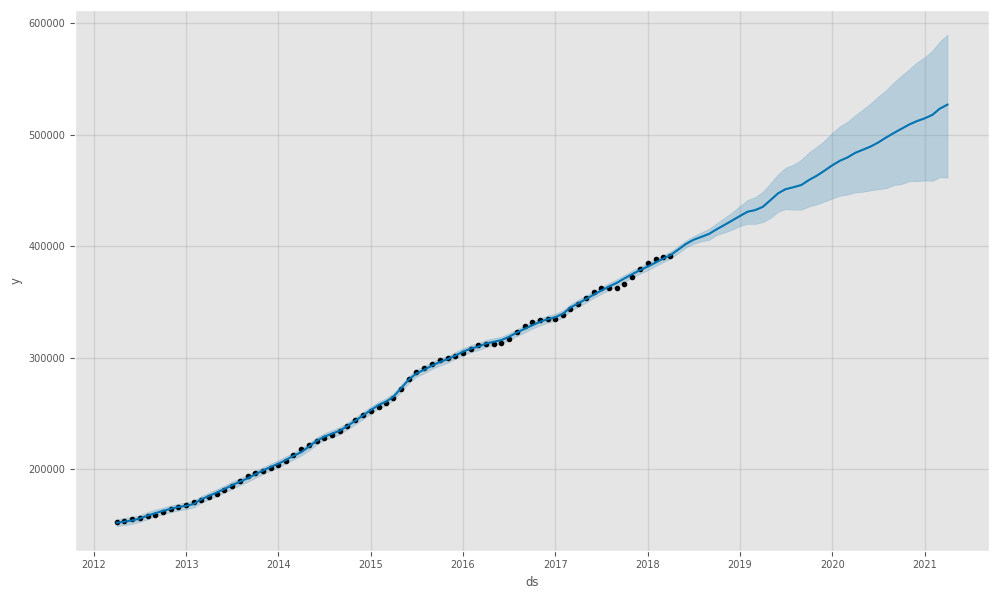

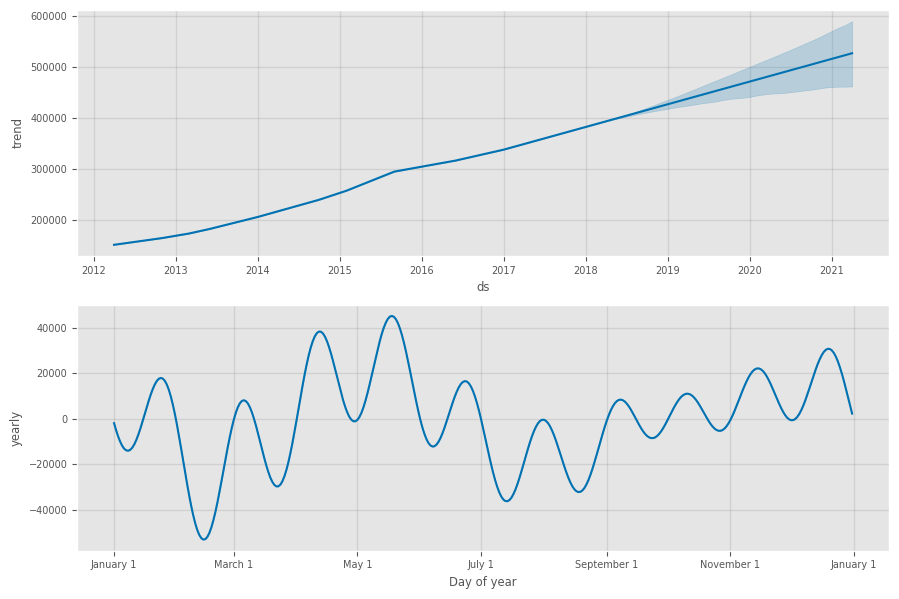

In [95]:
actual, predicted, metrics_df = prophet_model('Atlanta, GA')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

#### **Jekyll Island, GA - Facebook Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/phs8w911.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/wy55eb75.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23627', 'data', 'file=/tmp/tmpvvruqi_m/phs8w911.json', 'init=/tmp/tmpvvruqi_m/wy55eb75.json', 'output', 'file=/tmp/tmpvvruqi_m/prophet_model_u4ycgdr/prophet_model-20230829081946.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:19:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Jekyll Island, GA:
            ds           yhat     yhat_lower     yhat_upper
104 2020-12-01  697850.601768  543337.490414  838112.434279
105 2021-01-01  689699.227477  530932.672596  841965.337638
106 2021-02-01  683733.517545  521018.902920  836408.247860
107 2021-03-01  704051.933030  560906.225544  831635.895288
108 2021-04-01  712633.029169  567025.241164  861997.296581


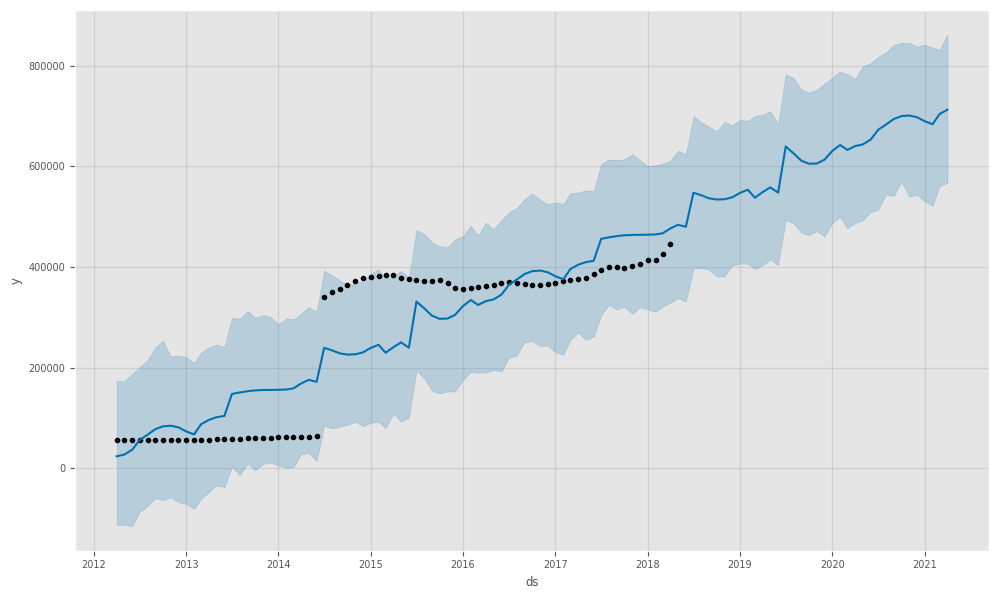

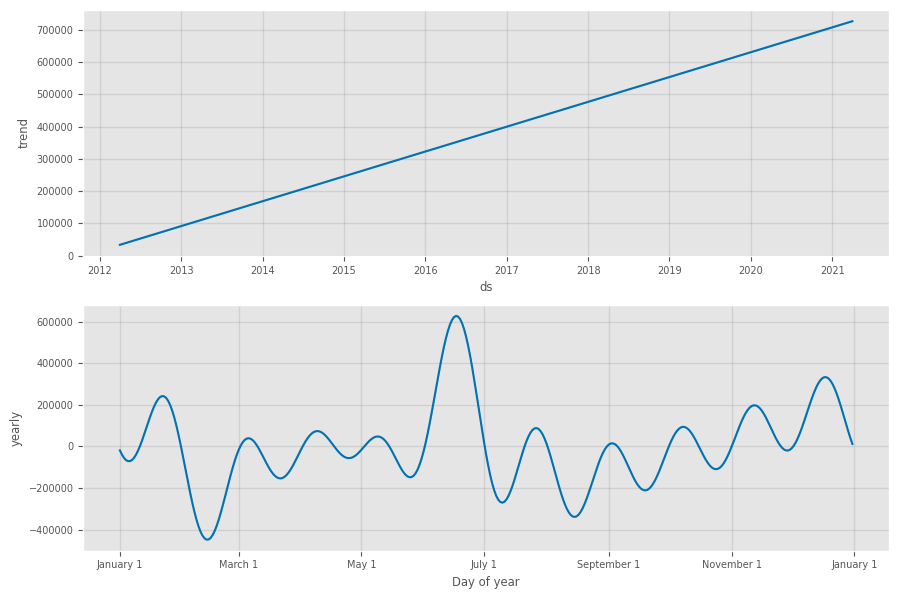

In [96]:
actual, predicted, metrics_df =  prophet_model('Jekyll Island, GA')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

#### **Decatur, TX - Facebook Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/wsfud8qs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/b0de3iy_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31515', 'data', 'file=/tmp/tmpvvruqi_m/wsfud8qs.json', 'init=/tmp/tmpvvruqi_m/b0de3iy_.json', 'output', 'file=/tmp/tmpvvruqi_m/prophet_modelpj5v447r/prophet_model-20230829081948.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:19:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Decatur, TX:
            ds           yhat     yhat_lower     yhat_upper
104 2020-12-01  246073.226102  219235.216812  271956.837960
105 2021-01-01  247258.705733  220010.541005  273300.172176
106 2021-02-01  247742.769363  218644.990822  275618.678586
107 2021-03-01  249373.056180  219006.087331  278146.025194
108 2021-04-01  250755.411585  219384.549475  281269.160872


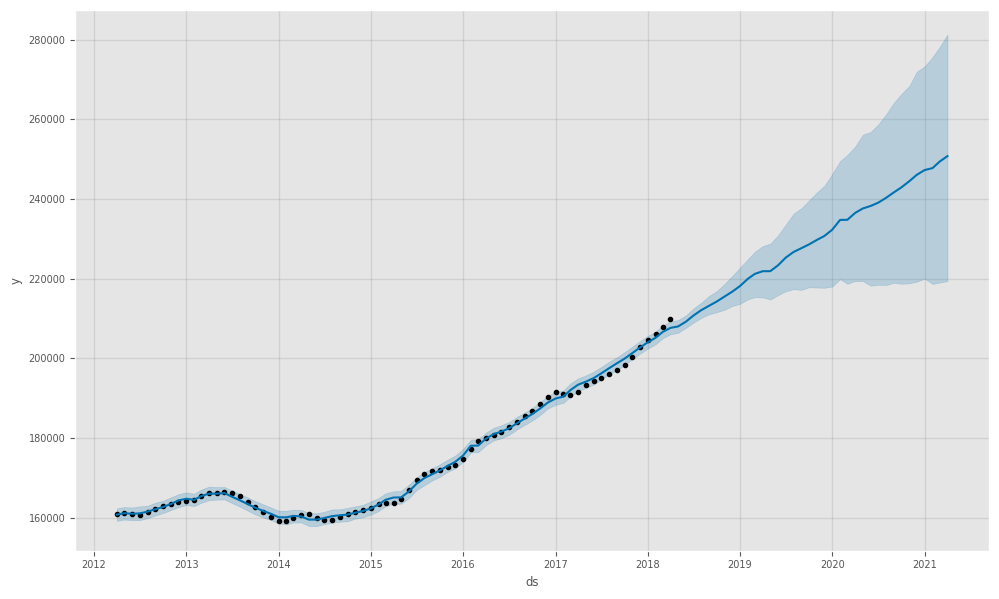

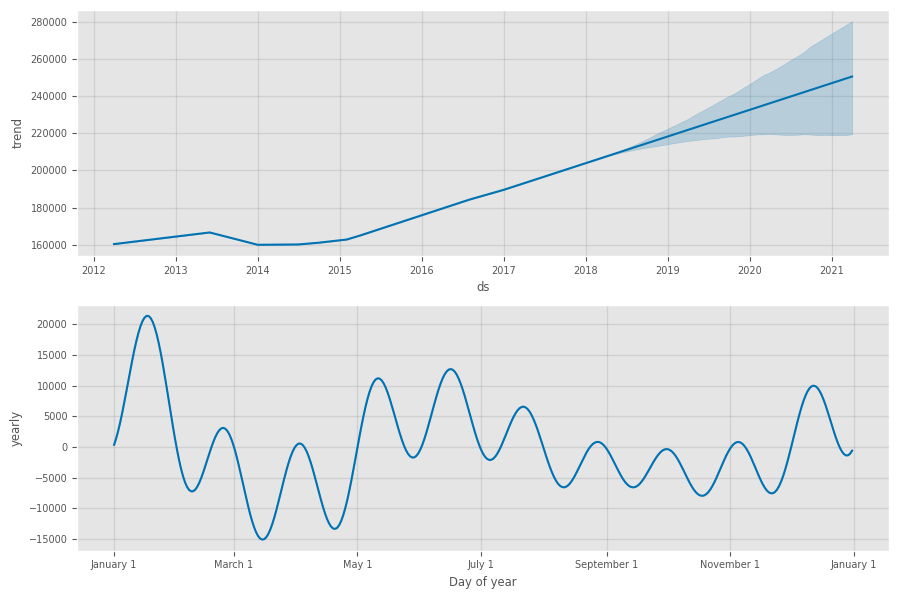

In [97]:
actual, predicted, metrics_df =  prophet_model('Decatur, TX')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

#### **Austin, TX - Facebook Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/phwedgjb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/t_6u4alr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77819', 'data', 'file=/tmp/tmpvvruqi_m/phwedgjb.json', 'init=/tmp/tmpvvruqi_m/t_6u4alr.json', 'output', 'file=/tmp/tmpvvruqi_m/prophet_modelj9_wqqjm/prophet_model-20230829081950.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Austin, TX:
            ds           yhat     yhat_lower     yhat_upper
104 2020-12-01  478140.887530  433993.046236  525963.291794
105 2021-01-01  480882.077735  434677.161259  530134.610561
106 2021-02-01  482387.694752  436853.538809  533225.978476
107 2021-03-01  482992.524619  432440.373185  537014.435636
108 2021-04-01  485384.969993  434191.126618  542010.151830


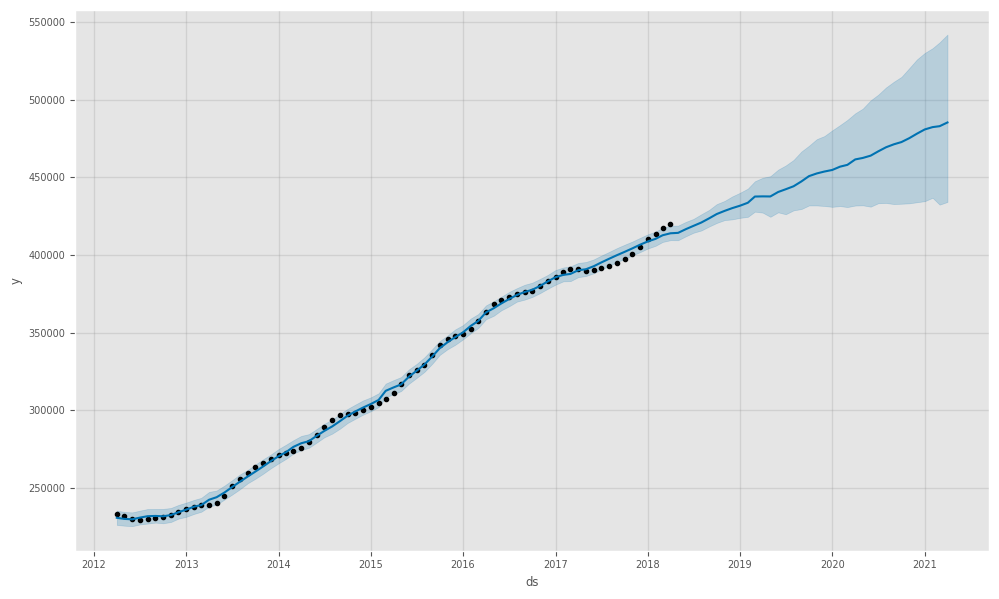

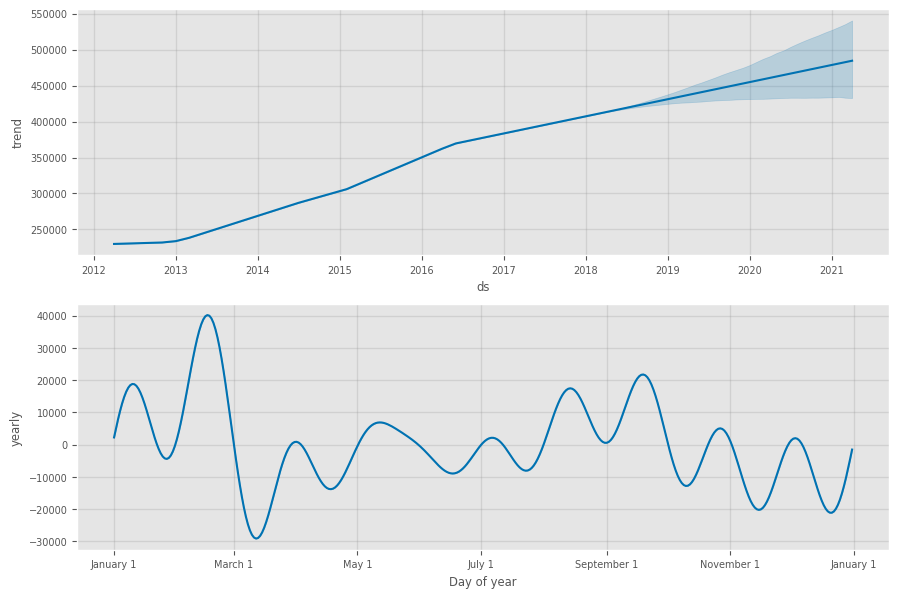

In [98]:
actual, predicted, metrics_df =  prophet_model('Austin, TX')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

#### **Soap Lake, WA - Facebook Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/tl98090a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvruqi_m/3lyhlyl1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98754', 'data', 'file=/tmp/tmpvvruqi_m/tl98090a.json', 'init=/tmp/tmpvvruqi_m/3lyhlyl1.json', 'output', 'file=/tmp/tmpvvruqi_m/prophet_modelioqsk90k/prophet_model-20230829081952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Soap Lake, WA:
            ds           yhat     yhat_lower     yhat_upper
104 2020-12-01  119937.665537  111241.455250  128457.601276
105 2021-01-01  120473.002594  112181.115982  129421.303793
106 2021-02-01  122980.051308  114145.778504  131626.837959
107 2021-03-01  120368.689945  111780.121727  129505.237135
108 2021-04-01  121650.402387  112211.278328  131151.979432


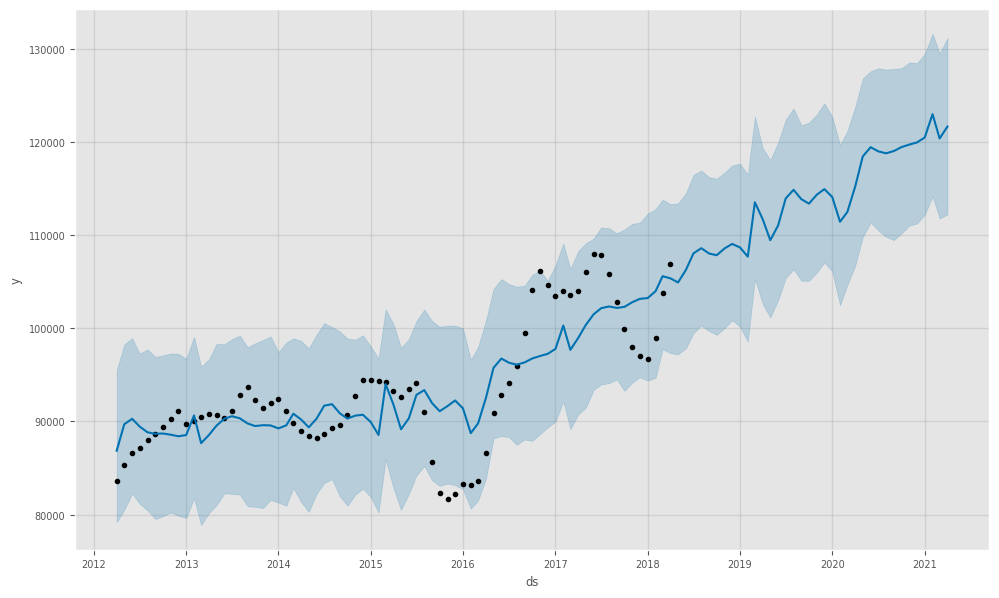

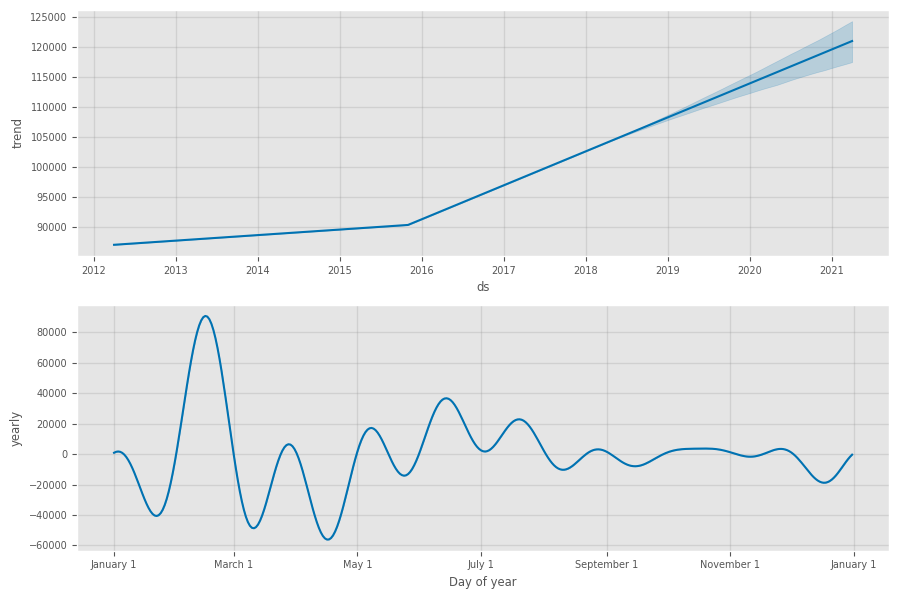

In [99]:
actual, predicted, metrics_df = prophet_model('Soap Lake, WA')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

### **f. Facebook Prophet Diagnostics**


In [100]:
final_fb_metrics_df = pd.concat(fb_metrics_dfs)
final_fb_metrics_df = final_fb_metrics_df.sort_values(by='RMSE')
print(final_metrics_df)

                           RMSE          AIC
Decatur, TX         5033.433673   765.971035
Harbeson, DE        5753.477978   912.078435
Harbeson, DE        5753.477978   912.078435
Atlanta, GA         6154.167274   892.355686
Old Fort, NC        6779.883346   692.602794
Soap Lake, WA      10254.866297   875.084354
Austin, TX         11318.298431  1006.814736
Fairmount, GA      13161.083951   835.732403
Jekyll Island, GA  30178.717667  1201.778543


## **7.0 Conclusion**

## **8.0 Recommendations**